# Trabajo Práctico Datos (75.06) - Análisis exploratorio de datos


El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

- El análisis debe estar hecho en R o Python Pandas.
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
- Agregar en Kaggle un kernel con el análisis exploratorio realizado.

La evaluación del TP se realizará en base al siguiente criterio:

- Originalidad del análisis exploratorio. 
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? ¿Descubrieron cosas que pueden ser de interés las personas que estén pensando en realizar alguna operación inmobiliaria, o a empresa Properati?


In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import calendar

### Carga de archivos:

In [13]:
#Carga de datos 2017
filenames_2017 = ['properties/properati-AR-2017-01-01-properties-sell.csv',
                 'properties/properati-AR-2017-02-01-properties-sell.csv',
                 'properties/properati-AR-2017-03-01-properties-sell.csv',
                 'properties/properati-AR-2017-04-01-properties-sell.csv',
                 'properties/properati-AR-2017-05-01-properties-sell.csv',
                 'properties/properati-AR-2017-06-01-properties-sell.csv',
                 'properties/properati-AR-2017-07-01-properties-sell.csv']

dataframes_2017 = []
for filename in filenames_2017:
    dataframes_2017.append(pd.read_csv(filename))
    
data_2017 = pd.DataFrame()
for dataframe in dataframes_2017:
    data_2017 = pd.concat([data_2017, dataframe]).drop_duplicates().reset_index(drop=True)
    
#Carga de datos 2016
filenames_2016 = ['properties/properati-AR-2016-01-01-properties-sell.csv', 
            'properties/properati-AR-2016-02-01-properties-sell.csv',
            'properties/properati-AR-2016-03-01-properties-sell.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv']

dataframes_2016 = []
for filename in filenames_2016:
    dataframes_2016.append(pd.read_csv(filename))

data_2016 = pd.DataFrame()
for dataframe in dataframes_2016:
    data_2016 = pd.concat([data_2016, dataframe]).drop_duplicates().reset_index(drop=True)

#Primer y segundo semestre de 2016
psem_2016 = pd.DataFrame()
for x in range(0,6):
    psem_2016 = pd.concat([psem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
ssem_2016 = pd.DataFrame()
for x in range(6,12):
    ssem_2016 = pd.concat([ssem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
#Primer y Segundo Semestre de 2015
psem_2015 = pd.read_csv('properties/properati-AR-2015-06-01-properties-sell-six_months.csv')
ssem_2015 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell-six_months.csv')
#Primer y Segundo Semestre de 2014
psem_2014 = pd.read_csv('properties/properati-AR-2014-07-01-properties-sell.csv')
ssem_2014 = pd.read_csv('properties/properati-AR-2015-01-01-properties-sell-six_months.csv')

dataset = pd.concat([data_2017, data_2016, psem_2015, ssem_2015, psem_2014, \
    ssem_2014]).drop_duplicates('properati_url').reset_index(drop=True)

In [14]:
#340 mil
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340843 entries, 0 to 340842
Data columns (total 28 columns):
country_name                  284004 non-null object
created_on                    340843 non-null object
currency                      285528 non-null object
description                   283987 non-null object
expenses                      24548 non-null float64
floor                         46468 non-null float64
geonames_id                   290946 non-null float64
id                            284004 non-null object
image_thumbnail               333992 non-null object
lat                           274848 non-null float64
lat-lon                       274848 non-null object
lon                           274848 non-null float64
operation                     340843 non-null object
place_name                    340804 non-null object
place_with_parent_names       340843 non-null object
price                         302565 non-null float64
price_aprox_local_currency    302563 

In [15]:
dataset.describe()

,expenses,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2
count,2.454800e+04,46468.000000,2.909460e+05,274848.000000,274848.000000,3.025650e+05,3.025630e+05,3.025630e+05,2.017480e+05,1.896040e+05,208387.000000,2.315080e+05,41946.000000,191854.000000
mean,3.311507e+03,13.766398,3.543024e+06,-34.657860,-59.181338,3.373835e+05,3.182114e+06,2.093471e+05,4.887414e+03,1.847658e+03,2.930840,8.799527e+03,180.737400,288.380456
std,2.846082e+04,111.181305,3.738874e+05,3.084452,2.936911,7.293827e+05,5.493488e+06,3.460052e+05,1.610292e+04,3.874451e+03,1.530437,4.156687e+06,382.390007,2089.084184
min,1.000000e+00,1.000000,3.427208e+06,-76.516815,-122.485251,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-05,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000
25%,8.500000e+02,2.000000,3.429979e+06,-34.680011,-58.696410,8.500000e+04,1.097685e+06,7.800000e+04,1.470588e+03,9.821429e+02,2.000000,4.500000e+01,50.000000,47.000000
50%,1.600000e+03,3.000000,3.431333e+06,-34.597958,-58.487398,1.500000e+05,1.916220e+06,1.290000e+05,2.031250e+03,1.625581e+03,3.000000,7.700000e+01,80.000000,89.000000
75%,3.100000e+03,6.000000,3.436077e+06,-34.468814,-58.392703,3.300000e+05,3.592912e+06,2.390000e+05,2.924755e+03,2.232143e+03,4.000000,1.580000e+02,188.000000,242.000000
max,2.300000e+06,7167.000000,6.948895e+06,52.619706,100.000000,1.234568e+08,7.984250e+08,5.000000e+07,2.600000e+06,1.271027e+06,40.000000,2.000000e+09,10000.000000,200000.000000


In [16]:
dataset['surface_covered_in_m2'] = pd.to_numeric(dataset['surface_covered_in_m2'], downcast='float').round(2)

In [17]:
dataset['surface_covered_in_m2'].describe()

count    2.315080e+05
mean     8.795377e+03
std      4.156682e+06
min      0.000000e+00
25%      4.500000e+01
50%      7.700000e+01
75%      1.580000e+02
max      2.000000e+09
Name: surface_covered_in_m2, dtype: float64

In [21]:
dataset['lat-lon'].head(10)

0                        NaN
1      -34.592891,-58.408693
2    -38.1105196,-57.6208718
3                        NaN
4                        NaN
5      -34.898361,-58.008188
6      -34.877834,-58.083429
7      -32.954717,-60.643063
8      -32.954717,-60.643063
9      -32.954717,-60.643063
Name: lat-lon, dtype: object

## Análisis de 2016 y 2017.

In [86]:
#Convertiremos la fecha de publicación
#Agregamos las series año y mes como columnas
def numero_de_mes_a_nombre(x):
    if x.month == 1: return '01 Enero'
    if x.month == 2: return '02 Febrero'
    if x.month == 3: return '03 Marzo'
    if x.month == 4: return '04 Abril'
    if x.month == 5: return '05 Mayo'
    if x.month == 6: return '06 Junio'
    if x.month == 7: return '07 Julio'
    if x.month == 8: return '08 Agosto'
    if x.month == 9: return '09 Septiembre'
    if x.month == 10: return '10 Octubre'
    if x.month == 11: return '11 Noviembre'
    if x.month == 12: return '12 Diciembre'


data_2016['Date'] = pd.to_datetime(data_2016['created_on'])
data_2016['Anio'] = data_2016['Date'].map(lambda x:x.year)
data_2016['Mes'] = data_2016['Date'].map(numero_de_mes_a_nombre)

In [87]:
#Chequeo los tipos
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143251 entries, 0 to 143250
Data columns (total 30 columns):
id                            143251 non-null object
created_on                    143251 non-null object
operation                     143251 non-null object
property_type                 143251 non-null object
place_name                    143229 non-null object
place_with_parent_names       143251 non-null object
country_name                  143251 non-null object
state_name                    143251 non-null object
geonames_id                   121249 non-null float64
lat-lon                       113825 non-null object
lat                           113825 non-null float64
lon                           113825 non-null float64
price                         131660 non-null float64
currency                      121378 non-null object
price_aprox_local_currency    131660 non-null float64
price_aprox_usd               131660 non-null float64
surface_total_in_m2           91221

In [88]:
#Vista final del dataframe
data_2016.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Date,Anio,Mes
0,6c0506bbb9df96cbf7b5b2f64fc594ddfe7b1235,2015-07-01,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.011817,-57.5470291",...,NaN,5.0,NaN,http://www.properati.com.ar/rlor_venta_casa_ma...,"Lote 11, 25 x 26, Living Comedor en L 8,50x4,5...",CHAUVIN CHALET 4 DORMITORIOS C/ DEPENDENCIA,https://thumbs4.properati.com/0/j7bizx1makQIMP...,2015-07-01,2015,07 Julio
1,d758dcbe4f031408b5aa2890172359a410f43b47,2015-07-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5745944268,-58.4192548517",...,NaN,1.0,1500.0,http://www.properati.com.ar/rlpn_venta_departa...,VENTA DEPARTAMENTO DE 1 AMBIENTE CON PATIO EN ...,Departamento en Palermo,https://thumbs4.properati.com/7/pc6PYWBGhUnn6u...,2015-07-01,2015,07 Julio
2,6fd3eeea15a5ce3baee2f45674949145610915bb,2015-07-01,sell,house,Lanús,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,...,NaN,NaN,NaN,http://www.properati.com.ar/rlq6_venta_casa_lanus,None- Estado del inmueble: EXCELENTE- Mejoras:...,.,NaN,2015-07-01,2015,07 Julio
3,5bc097e3828edf6d418c182dc229d60e497d0ce8,2015-07-01,sell,house,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,"-34.7890466,-58.4135609",...,NaN,NaN,NaN,http://www.properati.com.ar/rlq7_venta_casa_te...,"Muy buen Chalet, a 2 cuadras e Hipermeracado J...",Casa en Temperley Oeste,https://thumbs4.properati.com/2/4Gkhh9RmHVLM6_...,2015-07-01,2015,07 Julio
4,6fc22ab45c641532594ef8fecd145117ab1c6cbf,2015-07-01,sell,house,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.7507803881,-58.3734663672",...,NaN,NaN,NaN,http://www.properati.com.ar/rlq9_venta_casa_lo...,None- Estado del inmueble: REGULAR- Tiene gara...,Casa en Lomas de Zamora Oeste,https://thumbs4.properati.com/3/GirmoJ_563ED0N...,2015-07-01,2015,07 Julio


In [89]:
#Tenemos que tener en cuenta solamente CABA y Gran Buenos Aires, por lo que debemos
#filtrarlas.
data_2016.shape

(143251, 30)

In [90]:
data_2016 = data_2016.loc[(data_2016.state_name.str.contains('G.B.A')) | (data_2016.\
    state_name.str.contains('Capital Federal')), :]
data_2016.shape

(101612, 30)

Se filtraon 41639 publicaciones

In [91]:
#Estamos trabajando con las de 2016 nada mas. Filtramos las otras.
data_2016 = data_2016.loc[data_2016.Anio == 2016, :]
data_2016.shape

(80138, 30)

Se filtraron 21474 publicaciones

In [92]:
data_2016.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Anio
count,6.380600e+04,63282.000000,63282.000000,7.593300e+04,7.593300e+04,7.593300e+04,55617.000000,68689.000000,4.699100e+04,6.291100e+04,10351.000000,48218.000000,9594.000000,80138.0
mean,3.503265e+06,-34.571615,-58.519601,3.028644e+05,3.847896e+06,2.409679e+05,251.677814,150.262371,1.904068e+03,3.694225e+03,16.763501,3.027666,3117.165833,2016.0
std,4.566917e+05,1.163268,1.049883,7.049635e+05,6.005088e+06,3.760583e+05,1646.471368,3882.348364,6.057877e+03,1.060099e+04,118.175115,1.479387,8474.931215,0.0
min,3.427208e+06,-38.952611,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,6.275958e-02,1.000000,1.000000,1.000000,2016.0
25%,3.429617e+06,-34.633140,-58.579658,9.460000e+04,1.437165e+06,9.000000e+04,48.000000,46.000000,1.065990e+03,1.527778e+03,2.000000,2.000000,1000.000000,2016.0
50%,3.430787e+06,-34.596355,-58.480479,1.600000e+05,2.395275e+06,1.500000e+05,91.000000,78.000000,1.727273e+03,2.053571e+03,3.000000,3.000000,1800.000000,2016.0
75%,3.435607e+06,-34.537734,-58.413649,3.000000e+05,4.391338e+06,2.750000e+05,234.000000,160.000000,2.369048e+03,2.806452e+03,6.000000,4.000000,3500.000000,2016.0
max,6.693230e+06,37.774929,3.379206,1.234568e+08,7.984250e+08,5.000000e+07,192014.000000,987897.000000,1.271027e+06,1.016822e+06,6072.000000,32.000000,500000.000000,2016.0


In [93]:
data_2016.shape

(80138, 30)

In [94]:
#Podemos observar que hay publicaciones de precio y superficie 0. Por lo tanto hay 
#que filtrarlas.
data_2016 = data_2016.loc[(data_2016.surface_total_in_m2 != 0.0), :]
data_2016 = data_2016.loc[(data_2016.price_aprox_usd != 0.0), :]
data_2016.shape

(72080, 30)

Se filtraron 8058 publicaciones

In [95]:
#Quedo bien filtrado
data_2016.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Anio
count,5.737700e+04,56712.000000,56712.000000,6.816900e+04,6.816900e+04,6.816900e+04,49552.000000,63160.000000,4.698700e+04,5.998700e+04,9696.000000,43120.000000,8711.000000,72080.0
mean,3.507229e+06,-34.564128,-58.527363,3.214704e+05,4.063713e+06,2.544831e+05,274.849673,148.588078,1.904230e+03,3.743487e+03,16.877888,2.988451,3138.077029,2016.0
std,4.706444e+05,1.227143,1.102325,7.344671e+05,6.158779e+06,3.856830e+05,1741.059589,3978.770262,6.058110e+03,1.078267e+04,105.245961,1.458393,8828.268982,0.0
min,3.427208e+06,-38.952611,-122.419415,2.600000e+03,7.746862e+04,4.851340e+03,10.000000,0.000000,1.000000e+00,6.275958e-02,1.000000,1.000000,1.000000,2016.0
25%,3.429595e+06,-34.629974,-58.579658,1.000000e+05,1.532976e+06,9.600000e+04,55.000000,46.000000,1.066522e+03,1.530612e+03,2.000000,2.000000,1000.000000,2016.0
50%,3.430596e+06,-34.595648,-58.480399,1.691470e+05,2.538992e+06,1.590000e+05,103.000000,78.000000,1.727273e+03,2.058824e+03,3.000000,3.000000,1800.000000,2016.0
75%,3.435607e+06,-34.537631,-58.415671,3.200000e+05,4.551022e+06,2.850000e+05,251.000000,161.000000,2.369048e+03,2.820513e+03,6.000000,4.000000,3456.000000,2016.0
max,6.693230e+06,37.774929,3.379206,1.234568e+08,7.984250e+08,5.000000e+07,192014.000000,987897.000000,1.271027e+06,1.016822e+06,2177.000000,32.000000,500000.000000,2016.0


<br><B><FONT FACE="Arial" SIZE="5">1) Analisis de la cantidad de publicaciones segun tipo de propiedad,zona, caracteristicas</FONT></B><br/>
<br><B><FONT FACE="Arial" SIZE="3">El fin de estos plots es mostrar la relacion entre la cantidad de publicaciones y el tipo de propiedad, sus caracteristicas y su locacion</FONT></B><br/>


<br><B><FONT FACE="Arial" SIZE="3">¿Que tipo de propiedad se puso mas en venta?</FONT></B><br/>

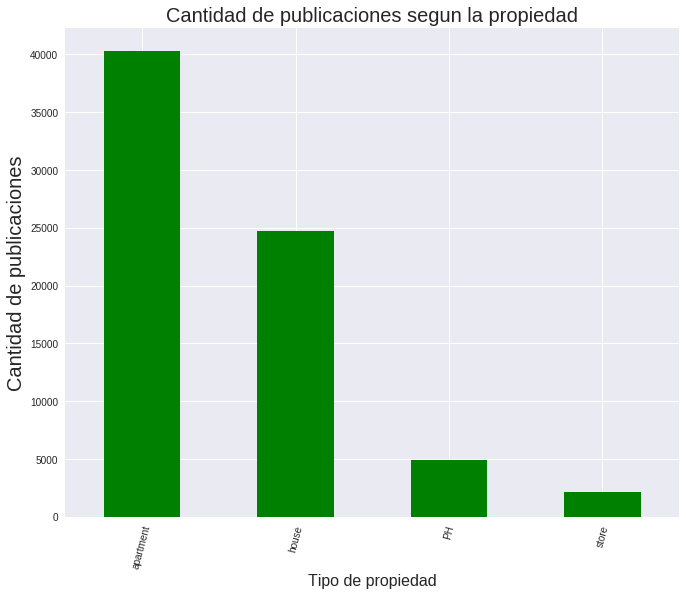

In [96]:
data_2016['property_type'].value_counts().plot(kind='bar', color='green', rot=75, \
                                               figsize=(11,9))
plt.title('Cantidad de publicaciones segun la propiedad', fontsize=20);
plt.xlabel('Tipo de propiedad', fontsize=16);
plt.ylabel('Cantidad de publicaciones', fontsize=20);

Los departametos son los que mas en venta se ponen, seguidos por las casas.

<br><B><FONT FACE="Arial" SIZE="3">¿En que mes se publica la mayor cantidad de cada tipo de propiedad?</FONT></B><br/>
<br><B><FONT FACE="Arial" SIZE="3">¿Que tipo de propiedad se publica mas en cada vez?</FONT></B><br/>

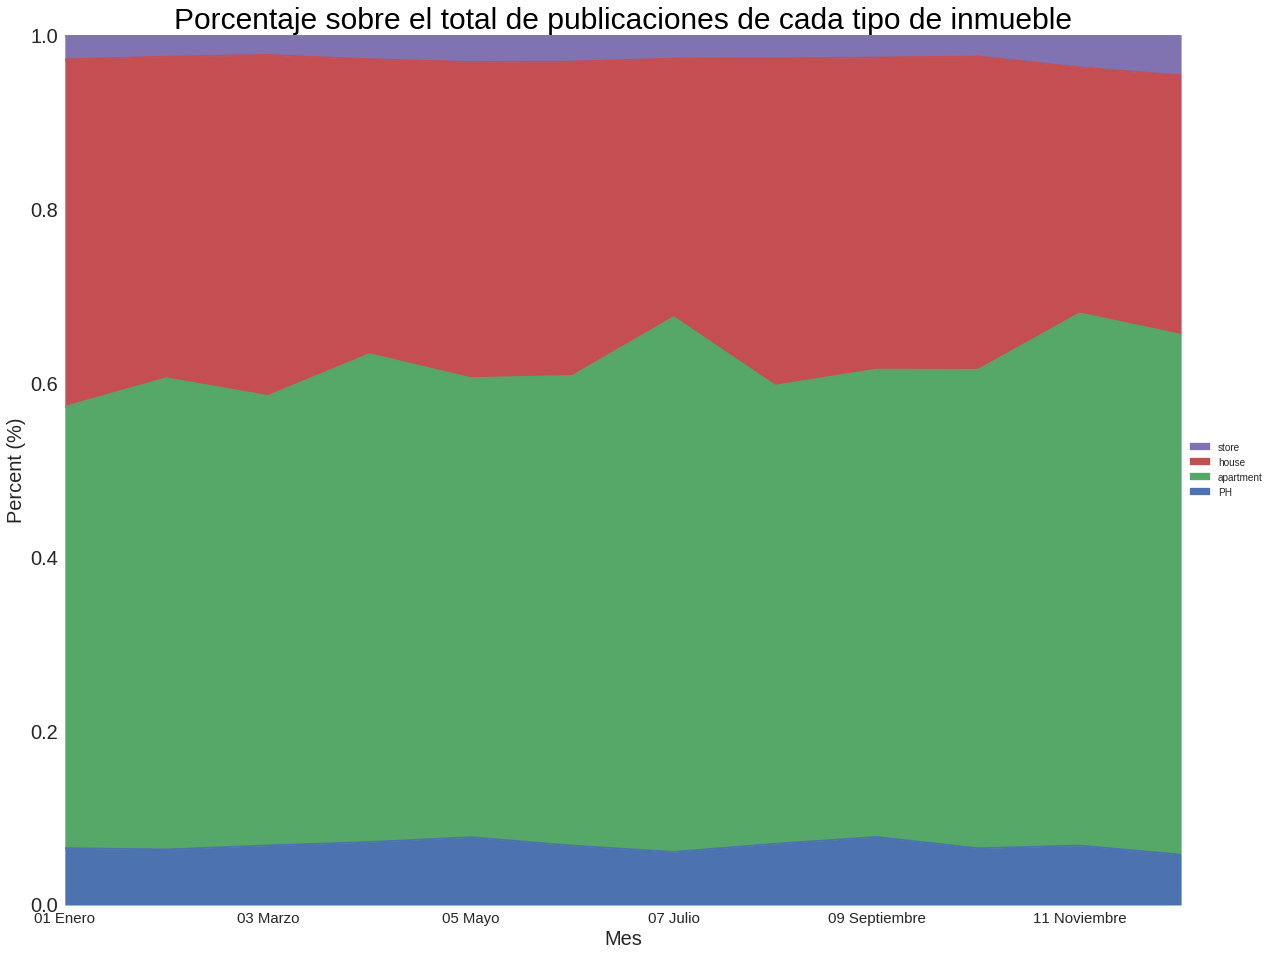

In [97]:
# gráfico de area. lo dejo, después lo usamos o no. Como les parezca

ga = pd.DataFrame(data_2016.loc[:,['property_type', 'Mes']].groupby(['Mes','property_type']).size())
ga.columns=['size']
ga.reset_index(inplace=True)
pivoted = pd.pivot_table(ga, values='size', columns='property_type', index= 'Mes')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Porcentaje sobre el total de publicaciones de cada tipo de inmueble', color='black',size = 30)
ax = pivoted.plot(kind='area', stacked=True,figsize=(20,16),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)', size = 20);
ax.set_xlabel('Mes', size = 20);
ax.set_ylim(0,1)
plt.yticks(size = 20)
plt.xticks(size = 15)
plt.show()

<br><B><FONT FACE="Arial" SIZE="3">Entre GBA y CABA, ¿Donde se realizaron mayor cantidad de publicaciones?</FONT></B><br/>

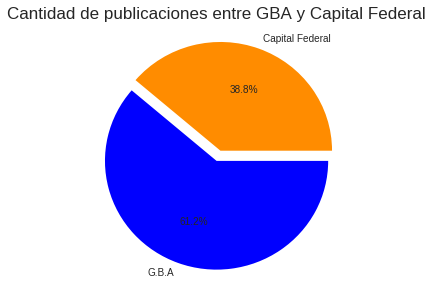

In [98]:
capital_federal = data_2016.loc[data_2016.state_name.str.contains('Capital Federal') == True]
gba = data_2016.loc[data_2016.state_name.str.contains('G.B.A') == True]
zonas = [capital_federal.size, gba.size]
nombres = ['Capital Federal', 'G.B.A']

plt.figure(figsize=(5, 5))
plt.title('Cantidad de publicaciones entre GBA y Capital Federal', fontsize=17)
plt.pie(zonas, labels=nombres, autopct='%1.1f%%', colors=['DarkOrange', 'Blue'],explode=(0.1, 0))
plt.show()

Podemos decir que en G.B.A se realizan mas publicaciones que en capital federal. En 2016 hay un 22.4% de diferencia.

<br><B><FONT FACE="Arial" SIZE="3">¿Cuales son las 10 localidades con mayor cantidad de publicaciones?</FONT></B><br/>

In [99]:
data_2016.groupby('place_name').size().sort_values(ascending=False).head(10)

place_name
Nordelta        3262
Tigre           2741
Palermo         2562
Ramos Mejía     2409
Belgrano        2236
Pilar           1830
Caballito       1722
Olivos          1603
Villa Crespo    1359
Benavidez       1350
dtype: int64

<br><B><FONT FACE="Arial" SIZE="3">¿En que lat-lon se concentra la mayor cantidad de publicaciones?</FONT></B><br/>

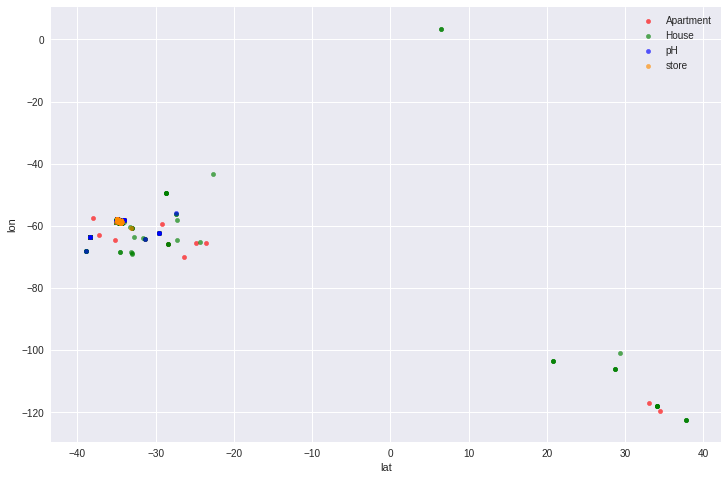

In [100]:
data_2016.loc[data_2016.property_type.str.contains('apartment'), :].\
    plot.scatter(x='lat', y='lon', color='Red', alpha=0.65, label='Apartment')
ax = plt.gca()
data_2016.loc[data_2016.property_type.str.contains('house'), :].plot.scatter(x='lat', y='lon', color='Green',\
            alpha=0.65, ax = ax, label='House')
ax = plt.gca()
data_2016.loc[data_2016.property_type.str.contains('PH'), :].plot.scatter(x='lat', y='lon', color='Blue',\
            alpha=0.65, ax = ax, label='pH',figsize=(12,8))
ax = plt.gca()
data_2016.loc[data_2016.property_type.str.contains('store'), :].plot.scatter(x='lat', y='lon', color='DarkOrange',\
            alpha=0.65, ax = ax, label='store', figsize=(12,8))

Podemos ver una zona (longitud-latitud) donde se presneta una concentracion de publicaciones

<br><B><FONT FACE="Arial" SIZE="5">2) Analisis de las caracteristicas de las publicaciones</FONT></B><br/>


<br><B><FONT FACE="Arial" SIZE="3">Analizaremos que caracteriza a las publicaciones</FONT></B><br/>
<br><B><FONT FACE="Arial" SIZE="3">¿Que relacion hay entre el tipo de propiedad y el precio?</FONT></B><br/>

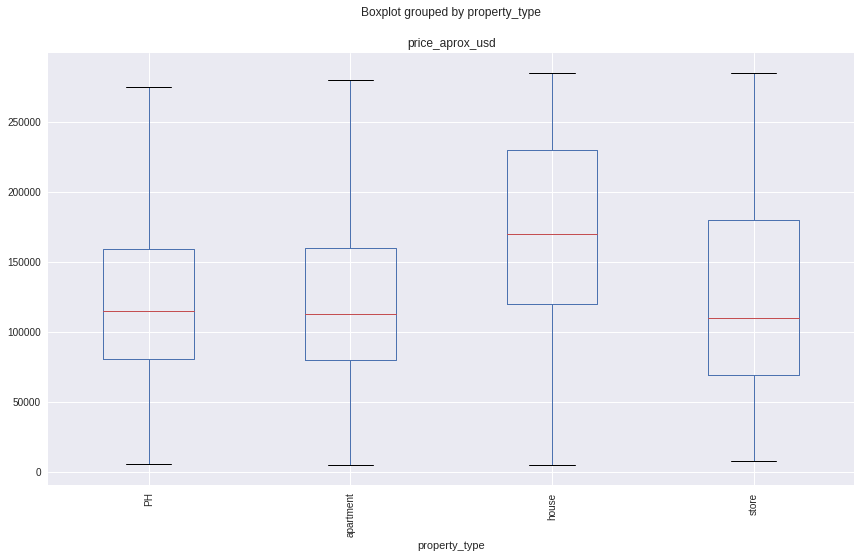

In [101]:
data_2016.loc[(data_2016.price_aprox_usd >= 4.851340e+03) & (data_2016.price_aprox_usd\
    <= 2.850000e+05), :].boxplot('price_aprox_usd',by='property_type',figsize=(14,8),\
    rot=90)

Podemos ver que la media de los precios de las casas es la mas alta, mientras que la del resto de los tipos de propiedades se mantienen parejas. Podemos ver que el 75% de las casas tienen un precio mucho mayor con relacion a las demas propiedades y aun el 25% estan sobre la media de los departamentos, ph y store. Para los ph y departamentos encontramos algunos precios atipicos. Ademas los maximos y minimos entre tipos de propiedades no presentan grandes variaciones.

<br><B><FONT FACE="Arial" SIZE="3">¿Influye la cantidad de habitaciones en el precio?</FONT></B><br/>

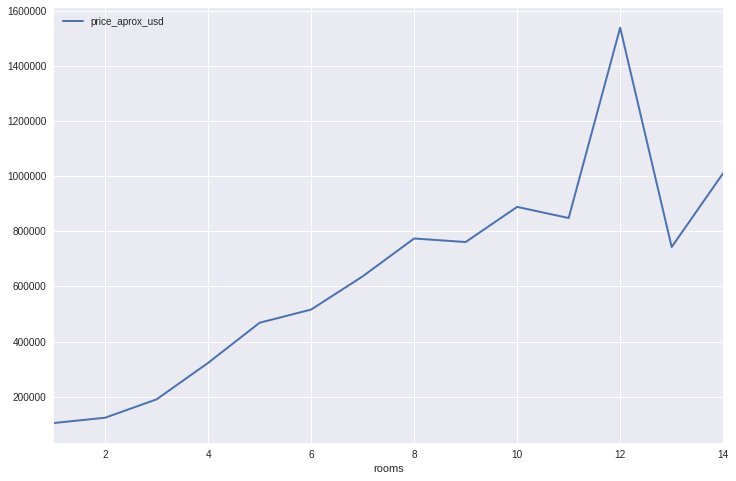

In [102]:
#Nos interesan las publicaciones mas comunes con menos de 15 habitaciones
data_2016.loc[data_2016.rooms < 15, ['price_aprox_usd', 'rooms']].groupby('rooms').\
    mean().plot(kind='line', linewidth=2,figsize=(12,8))

Claramente podes ver una relacion entre las habitaciones y el precio promedio segun la cantidad.

<br><B><FONT FACE="Arial" SIZE="3">¿Influyen las caracteristicas de la zona en los precios?</FONT></B><br/>


<br><B><FONT FACE="Arial" SIZE="2">Analizamos la localidad de Caballito para si influye en los precios el estar cerca de una avenida, estacion, etc.</FONT></B><br/>

<br><B><FONT FACE="Arial" SIZE="2">Mostramos como bajan los precios por la calle al alejarnos de Av de Mayo.</FONT></B><br/>

In [103]:
#Casas a medida que nos alejamos de av de mayo
data_2016[data_2016.id.str.contains('1d3db3980fda390d9c75adbb8c4f55ee6dd83edf') == True]['price_usd_per_m2']

44598    2826.086957
Name: price_usd_per_m2, dtype: float64

In [104]:
data_2016[data_2016.id.str.contains('86bed9445dcc04787cf6ff25e4e106db377c62e0') == True]['price_usd_per_m2']

92487    2673.076923
Name: price_usd_per_m2, dtype: float64

In [105]:
data_2016[data_2016.id.str.contains('79cec928e1054e96d161148c98715fb0e3c02c3e') == True]['price_usd_per_m2']

142341    1831.395349
Name: price_usd_per_m2, dtype: float64

<br><B><FONT FACE="Arial" SIZE="2">Analizamos precios en funcion a la distancia de la estacion de Caballito.</FONT></B><br/>

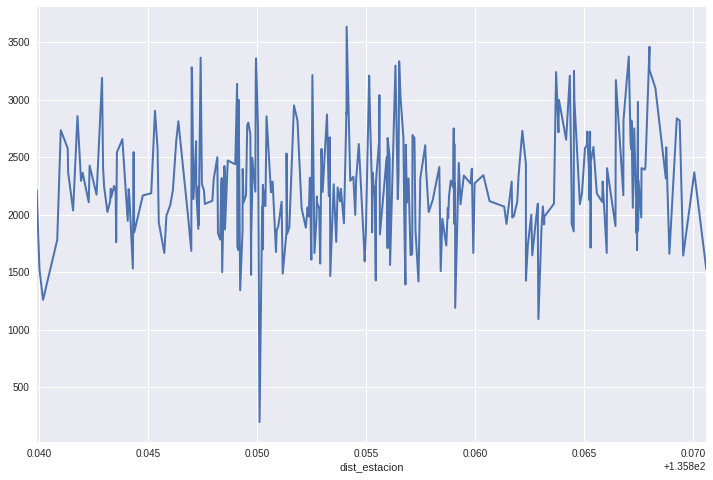

In [106]:
#Precio en funcion a la distancia(radio aprox) de la estacion de caballito
def distancia_estacion(prop):
       return  pow(pow(prop[0]-34.619189, 2) +  pow(prop[1]-58.443682, 2), 0.5)
    
caballito['dist_estacion'] = caballito['lat-lon'].apply(distancia_estacion)

caballito.groupby('dist_estacion').mean().loc[:, 'price_usd_per_m2'].plot(kind='line', linewidth=2,figsize=(12,8))


# ¿Cómo varía la cantidad de publicaciones a lo largo del año?
## ¿Cómo varía para cada uno de los meses? ¿Y para cada una de las estaciones? 

In [107]:
dataset['date'] = pd.to_datetime(dataset['created_on'])
dataset['año'] = dataset['date'].map(lambda x:x.year)
dataset['mes'] = dataset['date'].map(lambda x:x.month)

cant_por_mes = dataset.loc[:, ['año', 'mes']].groupby(['mes']).agg([np.size])
cant_por_mes = cant_por_mes.rename(columns={'año': 'size'})

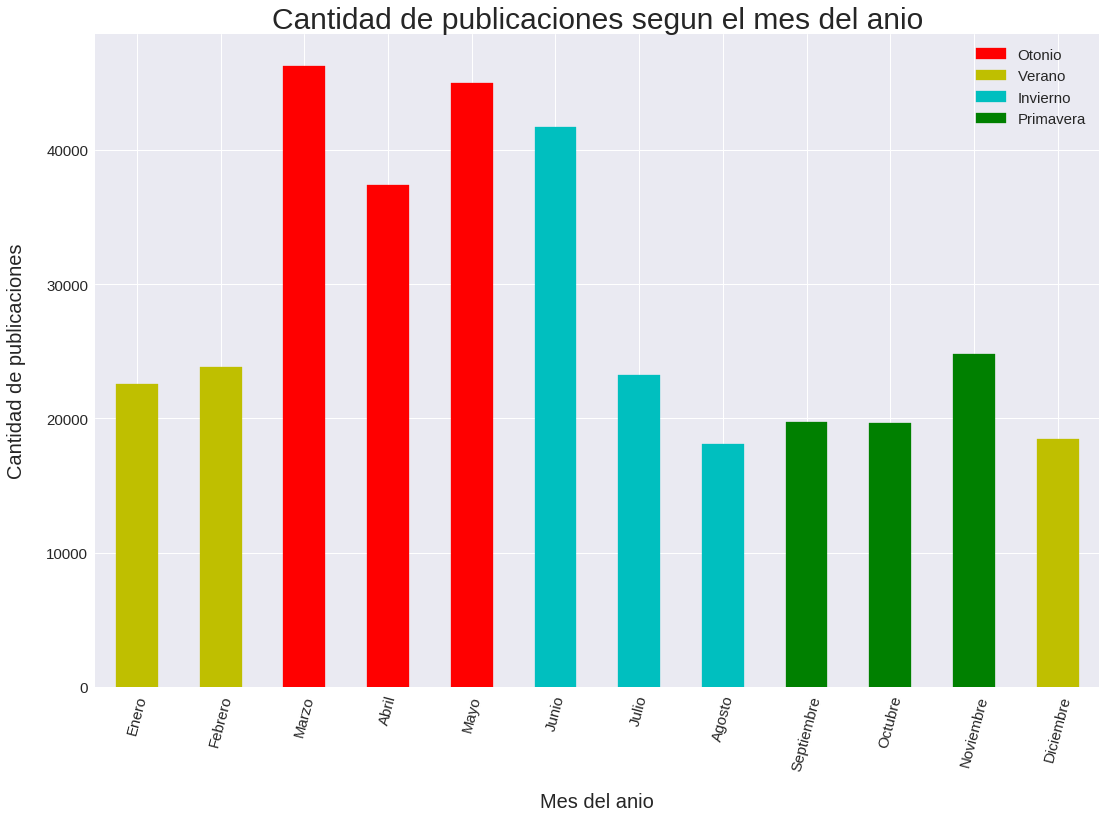

In [108]:
f= plt.figure()
ax = cant_por_mes['size'].plot(kind='bar', rot=75, figsize=(18,12), ax=f.gca())
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0);
ax.set_xlabel('Mes del anio',size=20.0,labelpad=20.0);
ax.set_title('Cantidad de publicaciones segun el mes del anio',size=30.0)
#color para cada estación del año
yellow_patch = mpatches.Patch(color='y', label='Verano')
red_patch = mpatches.Patch(color='r', label='Otonio')
cyan_patch = mpatches.Patch(color='c', label='Invierno')
green_patch = mpatches.Patch(color='g', label='Primavera')
plt.legend(handles=[red_patch,yellow_patch,cyan_patch,green_patch], prop={'size': 15.0})
#coloreo cada columna según la estación del año
ax.get_children()[0].set_color('y')
ax.get_children()[1].set_color('y')
ax.get_children()[2].set_color('r')
ax.get_children()[3].set_color('r')
ax.get_children()[4].set_color('r')
ax.get_children()[5].set_color('c')
ax.get_children()[6].set_color('c')
ax.get_children()[7].set_color('c')
ax.get_children()[8].set_color('g')
ax.get_children()[9].set_color('g')
ax.get_children()[10].set_color('g')
ax.get_children()[11].set_color('y')

ax.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto',\
                    'Septiembre','Octubre','Noviembre','Diciembre'], size= 15.0)
plt.yticks(size = 15)
plt.show()


Podemos observar que en los meses de Marzo y Mayo se da la mayor concentración de publicaciones creadas, seguidos por Junio y Abril. Por otro lado, Agosto y Diciembre son los meses en los que se crearon menor cantidad de publicaciones.
Refiriéndonos a las estaciones meteorológicas del año, entonces podríamos mencionar al Otoño como la estación del año que tiene mayor tendencia a la publicación de inmuebles.

## Progreso de los precios: ¿las propiedades en el AMBA están encareciendo?

In [109]:
#En principio, reduzco el set de datos a registros de capital federal + GBA
dataset_red = dataset
dataset_red.dropna(subset=['state_name'], inplace=True)
dataset_red = dataset_red.loc[(dataset_red.state_name.str.contains('G.B.A|Capital Federal')), ['state_name',\
            'created_on', 'price_usd_per_m2', 'place_name']]
dataset_red.dropna(inplace=True)
dataset_red['date'] = pd.to_datetime(dataset_red['created_on'])
dataset_red['año'] = dataset_red['date'].map(lambda x:x.year)

In [110]:
dataset_red.head(10)

,state_name,created_on,price_usd_per_m2,place_name,date,año
12,Bs.As. G.B.A. Zona Sur,2016-07-01,2368.421053,Lomas de Zamora,2016-07-01,2016
13,Bs.As. G.B.A. Zona Sur,2016-07-01,1301.587302,Banfield,2016-07-01,2016
15,Bs.As. G.B.A. Zona Oeste,2016-07-01,659.090909,San Justo,2016-07-01,2016
16,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
17,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
18,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
19,Bs.As. G.B.A. Zona Oeste,2016-07-01,1576.271186,San Justo,2016-07-01,2016
20,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo,2016-07-01,2016
21,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo,2016-07-01,2016
22,Bs.As. G.B.A. Zona Oeste,2016-07-01,1690.909091,San Justo,2016-07-01,2016


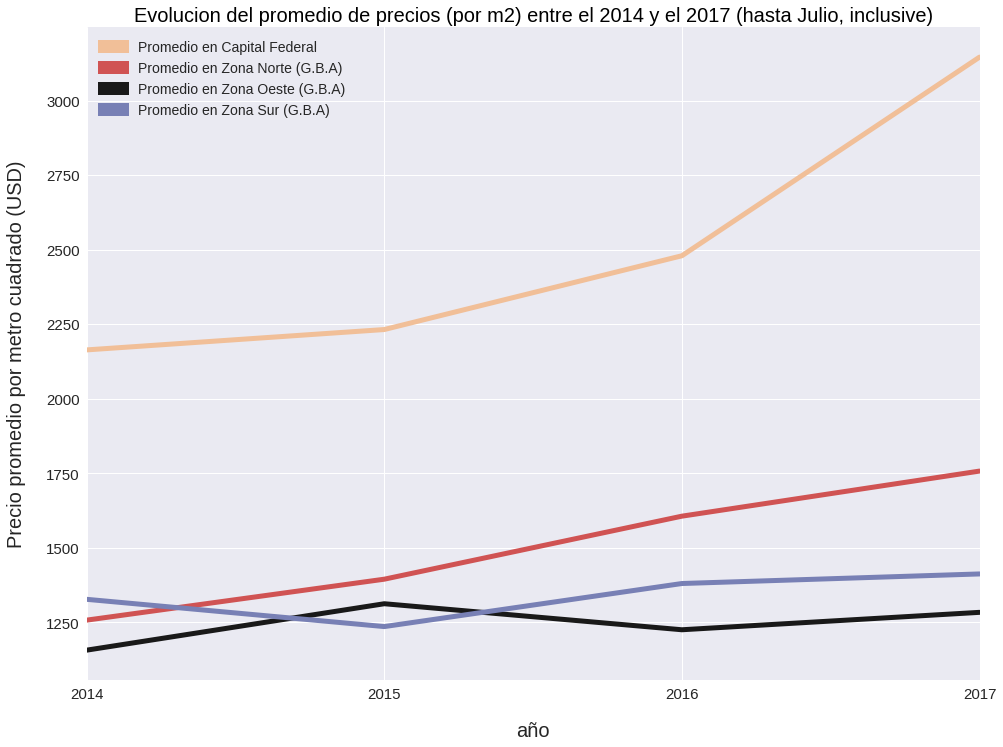

In [111]:
## El eje y de este gráfico no empieza en el 0

grouped_capital = dataset_red.loc[dataset_red.state_name.str.contains('Capital Federal'),['año', \
                'price_usd_per_m2']].groupby('año')['price_usd_per_m2'].agg([np.mean, np.size])
    
grouped_zn = dataset_red.loc[dataset_red.state_name.str.contains('Norte'),['año', 'price_usd_per_m2'\
                ]].groupby('año')['price_usd_per_m2'].agg([np.mean, np.size])

grouped_zo = dataset_red.loc[dataset_red.state_name.str.contains('Oeste'),['año', 'price_usd_per_m2'\
                ]].groupby('año')['price_usd_per_m2'].agg([np.mean, np.size])

grouped_zs = dataset_red.loc[dataset_red.state_name.str.contains('Sur'),['año', 'price_usd_per_m2'\
                ]].groupby('año')['price_usd_per_m2'].agg([np.mean, np.size])

    
f = plt.figure()
plt.xlabel('anio', size=20.0,labelpad=20.0);
plt.ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
plt.title('Evolucion del promedio de precios (por m2) entre el 2014 y el 2017 (hasta Julio, inclusive)'\
          ,color='black',size=20.0)

ax1 = grouped_capital['mean'].plot(linewidth=5.0,figsize=(16,12),color='#F1BF98',ax=f.gca())
ax1_patch=mpatches.Patch(color='#F1BF98', label='Promedio en Capital Federal',lw=3.0)
ax2 = grouped_zn['mean'].plot(linewidth=5.0,figsize=(16,12),color='#D05353',ax=f.gca())
ax2_patch=mpatches.Patch(color='#D05353', label='Promedio en Zona Norte (G.B.A)',lw=3.0)
ax3 = grouped_zo['mean'].plot(linewidth=5.0,figsize=(16,12),color='#191919', ax=f.gca())
ax3_patch=mpatches.Patch(color='#191919', label='Promedio en Zona Oeste (G.B.A)',lw=3.0)
ax4 = grouped_zs['mean'].plot(linewidth=5.0,figsize=(16,12),color='#7880B5',ax=f.gca())
ax4_patch=mpatches.Patch(color='#7880B5', label='Promedio en Zona Sur (G.B.A)',lw=3.0)

plt.legend(handles=[ax1_patch,ax2_patch,ax3_patch,ax4_patch], fontsize=14.0)
plt.xticks(range(2014,2018,1), size=15);
plt.yticks(size = 15)
plt.show()


Como podemos observar según el gráfico, en principio el promedio de precios en Capital Federal es prácticamente el doble, con respecto a los precios promedio en G.B.A. Además, Capital Federal es, en conjunto con la Zona Norte del Gran Buenos Aires, la zona en la que se dio un crecimiento sostenido en el promedio de precios.

Por otro lado, si bien Zona Oeste y Zona Sur del Gran Buenos Aires tuvieron períodos de baja (en el caso del primero, entre 2015 y 2016 y en el caso del segundo entre 2014 y 2015), ambas zonas registraron una alta en el precio promedio entre 2016 y 2017.

Es necesario aclarar que el año 2017 contempla únicamente información hasta Julio (inclusive) y es por eso que hay que tomar el análisis de este año como lo que es: un análisis parcial. También vale la pena aclarar que, al tratarse del precio promedio por metro cuadrado en dólares, la inflación del peso argentino no es un factor determinante en ésta variable.

# Analisis de precio en USD en funcion del barrio

# Top 5  de barrios con precios por propiedad en venta mas caros del segundo semestre del 2014 hasta julio del 2017 inclusive en USD en Capital Federal

In [112]:
top_barrios = dataset.loc[dataset.state_name.str.contains('Capital Federal') & \
            (dataset.place_name.str.contains('Capital Federal') == False) \
            & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
top_barrios.dropna(inplace=True)
top_barrios = top_barrios.groupby('place_name').agg([np.mean,np.size])
top_barrios = top_barrios.loc[top_barrios[('price_aprox_usd', 'size')]>100,:].\
            sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
top_barrios.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
top_barrios

,price_aprox_usd
,mean
place_name,
Palermo Chico,977763.291313
Puerto Madero,881928.403260
Retiro,429583.406906
Recoleta,407536.719853
Belgrano,353035.344893


Los barrios con propiedades con promedio de precio en dolares mas caras a lo largo del tiempo especificado son las mostradas, a continuacion se mostrara un analisis con el fin de determinar como estos barrios fueron modificando su,  precio o no, a lo largo de los semestres.

# Promedio de precios en USD en el 1er semestre 2014 segun top 5

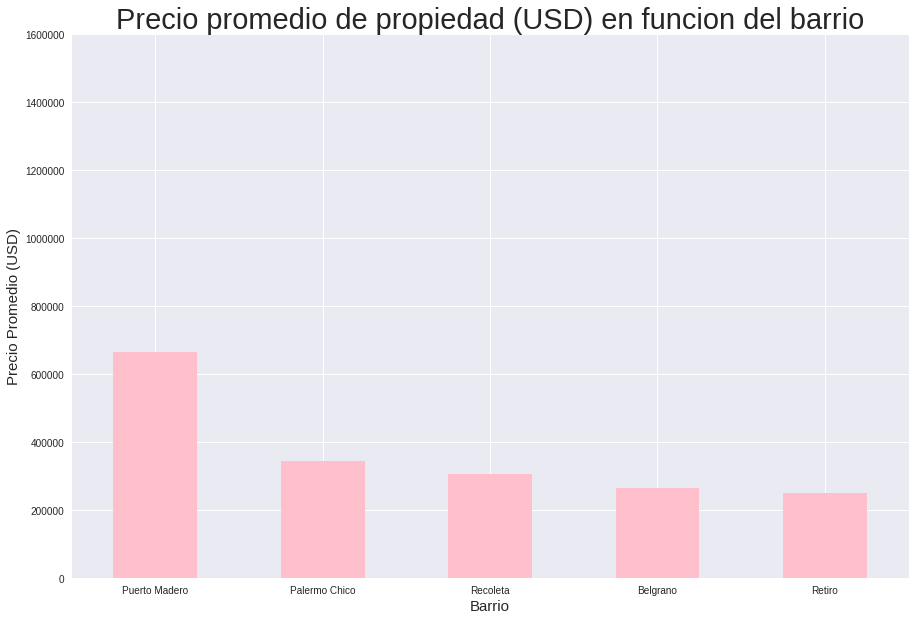

In [113]:
psem_2014_pr = psem_2014.loc[(psem_2014.place_name.str.contains('Palermo Chico') | \
                             psem_2014.place_name.str.contains('Puerto Madero') | \
                             psem_2014.place_name.str.contains('Retiro') | \
                             psem_2014.place_name.str.contains('Recoleta') | \
                             psem_2014.place_name.str.contains('Belgrano') ) \
                            & (psem_2014.price_aprox_usd > 0) \
                             & psem_2014.place_with_parent_names.str.contains('Capital Federal'),['place_name',\
                            'price_aprox_usd']]
psem_2014_pr.dropna(inplace=True)
psem_2014_pr = psem_2014_pr.groupby('place_name').agg([np.mean])
psem_2014_pr = psem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False)\
    .head(5)
fig1 = psem_2014_pr.plot(kind='bar', figsize =(15,10), color='pink', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

Para el 1er semestre del 2014 se puede ver como Puerto Madero esta muy por encima en precio de los demas barrios, 300000 dolares por encima de Palermo Chico, quien le sigue.

# Promedio de precios en USD en el 2do semestre 2014 segun top 5

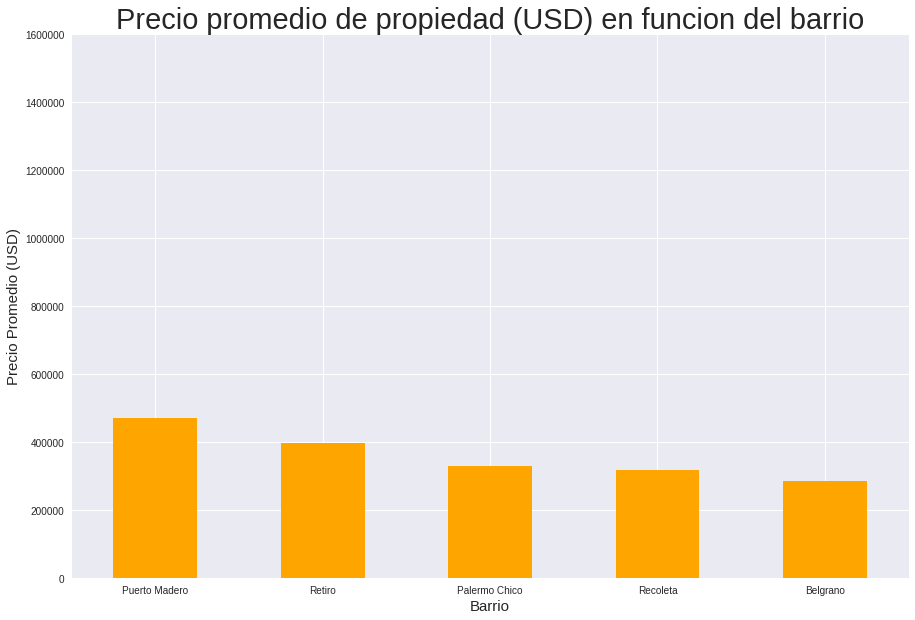

In [114]:
ssem_2014_pr = ssem_2014.loc[(ssem_2014.place_name.str.contains('Palermo Chico') | \
                             ssem_2014.place_name.str.contains('Puerto Madero') | \
                             ssem_2014.place_name.str.contains('Retiro') | \
                             ssem_2014.place_name.str.contains('Recoleta') | \
                             ssem_2014.place_name.str.contains('Belgrano') ) \
                            & (ssem_2014.price_aprox_usd > 0) & ssem_2014.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2014_pr.dropna(inplace=True)
ssem_2014_pr = ssem_2014_pr.groupby('place_name').agg([np.mean])
ssem_2014_pr = ssem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2014_pr.plot(kind='bar', figsize =(15,10), color='orange', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

Para el 2do semestre del 2014, el promedio de precios por propiedad crece para Retiro y decrece para Puerto Madero, para los demas barrios queda aproximadamente igual. Vemos entonces que para este anio los unico que presentaron variaciones fueron Puerto Madero y Retiro.

# Promedio de precios en USD en el 1er semestre 2015 segun top 5

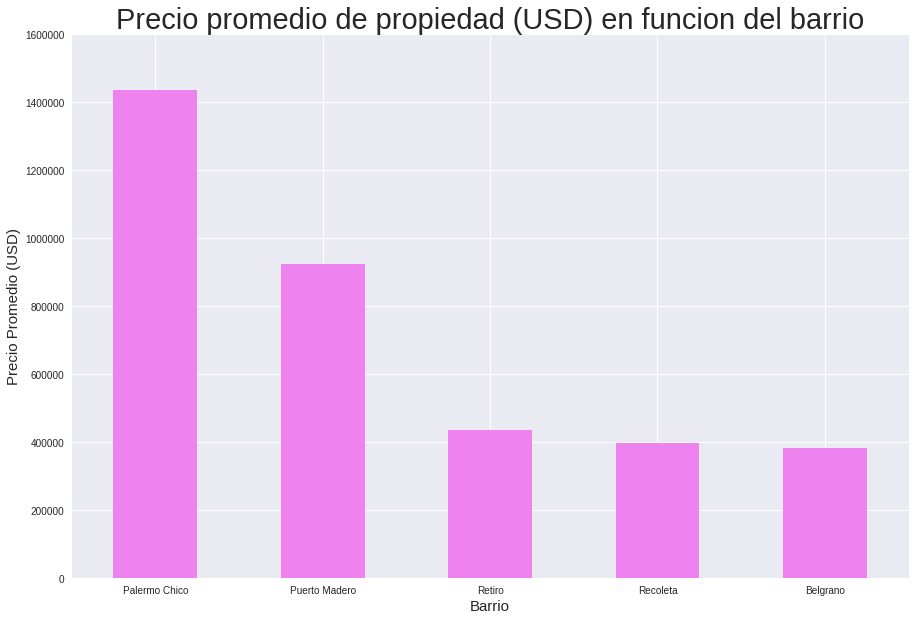

In [115]:
psem_2015_pr = psem_2015.loc[(psem_2015.place_name.str.contains('Palermo Chico') | \
                             psem_2015.place_name.str.contains('Puerto Madero') | \
                             psem_2015.place_name.str.contains('Retiro') | \
                             psem_2015.place_name.str.contains('Recoleta') | \
                             psem_2015.place_name.str.contains('Belgrano') ) \
                             & (psem_2015.price_aprox_usd > 0) & psem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2015_pr.dropna(inplace=True)
psem_2015_pr = psem_2015_pr.groupby('place_name').agg([np.mean])
psem_2015_pr = psem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2015_pr.plot(kind='bar', figsize =(15,10), color='violet', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

Ya en el 1er semestre del 2015, se puede ver que se dispara el valor promedio de las propiedades en Palermo Chico, pasando los 1400000 dolares. Todos los barrios aumentaron el valor de sus propiedades, Puerto Madero bastante mas que Recoleta, Retiro y Belgrano.

# Promedio de precios en USD en el 2do semestre 2015 segun top 5

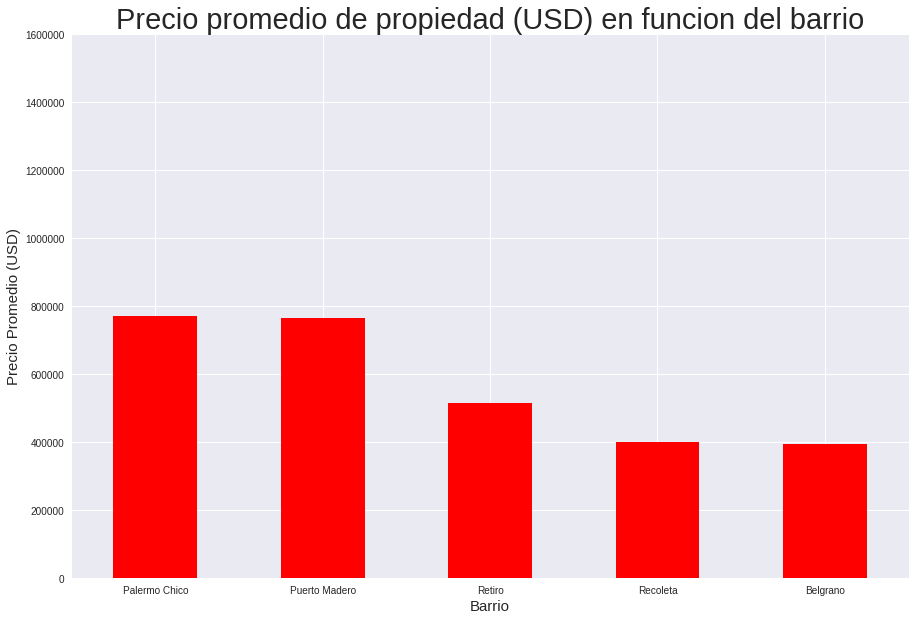

In [116]:
ssem_2015_pr = ssem_2015.loc[(ssem_2015.place_name.str.contains('Palermo Chico') | \
                             ssem_2015.place_name.str.contains('Puerto Madero') | \
                             ssem_2015.place_name.str.contains('Retiro') | \
                             ssem_2015.place_name.str.contains('Recoleta') | \
                             ssem_2015.place_name.str.contains('Belgrano') ) \
                             & (ssem_2015.price_aprox_usd > 0) & ssem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2015_pr.dropna(inplace=True)
ssem_2015_pr = ssem_2015_pr.groupby('place_name').agg([np.mean])
ssem_2015_pr = ssem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2015_pr.plot(kind='bar', figsize =(15,10), color='r', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

2do semestre del 2015, Palermo Chico y Puerto Madero disminuyen el valor promedio de sus propiedades a cerca de los 800000 dolares, mientras que Retiro aumento el valor de las suyas por encima de los 500000 dolares. Por otra parte Recoleta y Belgrano mantuvieron aproximadamente sus valores.

# Promedio de precios en USD en el 1er semestre 2016 segun top 5

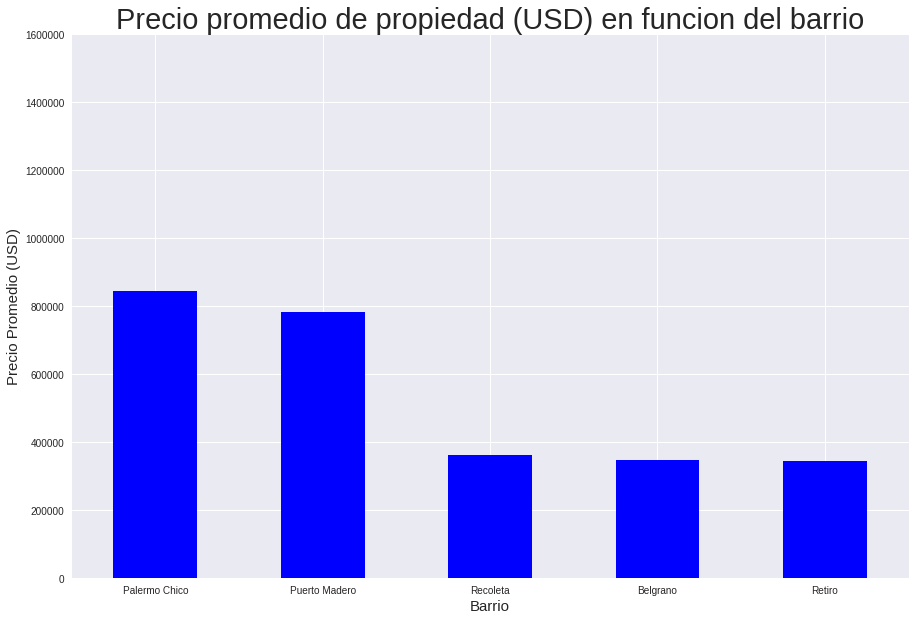

In [117]:
psem_2016_pr = psem_2016.loc[(psem_2016.place_name.str.contains('Palermo Chico') | \
                             psem_2016.place_name.str.contains('Puerto Madero') | \
                             psem_2016.place_name.str.contains('Retiro') | \
                             psem_2016.place_name.str.contains('Recoleta') | \
                             psem_2016.place_name.str.contains('Belgrano') ) \
                             & (psem_2016.price_aprox_usd > 0) & psem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2016_pr.dropna(inplace=True)
psem_2016_pr = psem_2016_pr.groupby('place_name').agg([np.mean])
psem_2016_pr = psem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2016_pr.plot(kind='bar', figsize =(15,10), color='b', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

En el 1er semestre del 2016 el mayor cambio se produce para Retiro, que disminuye su precio quedando cerca de los 300000 dolares promedio, Recoleta y Belgrano disminuyeron un poco sus precios. Por otra parte Palermo Chico subio los suyos, y Puerto Madero quedo aproximadamente en el mismo valor.

# Promedio de precios en USD en el 2do semestre 2016 segun top 5

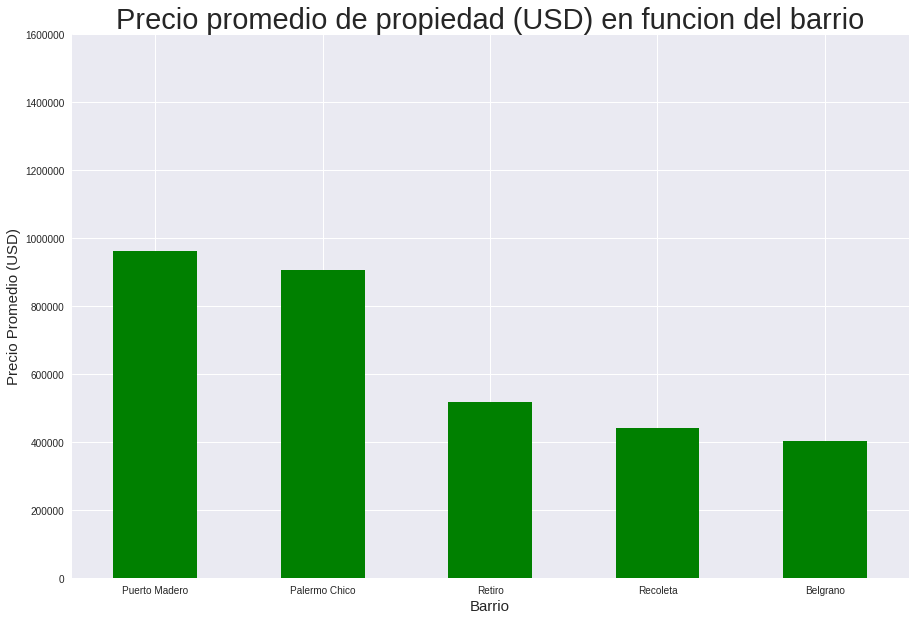

In [118]:
ssem_2016_pr = ssem_2016.loc[(ssem_2016.place_name.str.contains('Palermo Chico') | \
                             ssem_2016.place_name.str.contains('Puerto Madero') | \
                             ssem_2016.place_name.str.contains('Retiro') | \
                             ssem_2016.place_name.str.contains('Recoleta') | \
                             ssem_2016.place_name.str.contains('Belgrano') ) \
                             & (ssem_2016.price_aprox_usd > 0) & ssem_2016.state_name.str.contains(\
                            'Capital Federal'),['place_name', 'price_aprox_usd']]
ssem_2016_pr.dropna(inplace=True)
ssem_2016_pr = ssem_2016_pr.groupby('place_name').agg([np.mean])
ssem_2016_pr = ssem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2016_pr.plot(kind='bar', figsize =(15,10), color='g', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

En el 2do semestre de 2016 todos los barrios aumentan el precio promedio de sus propiedades.

# Promedio de precios en USD en 2017 (hasta julio) segun top 5

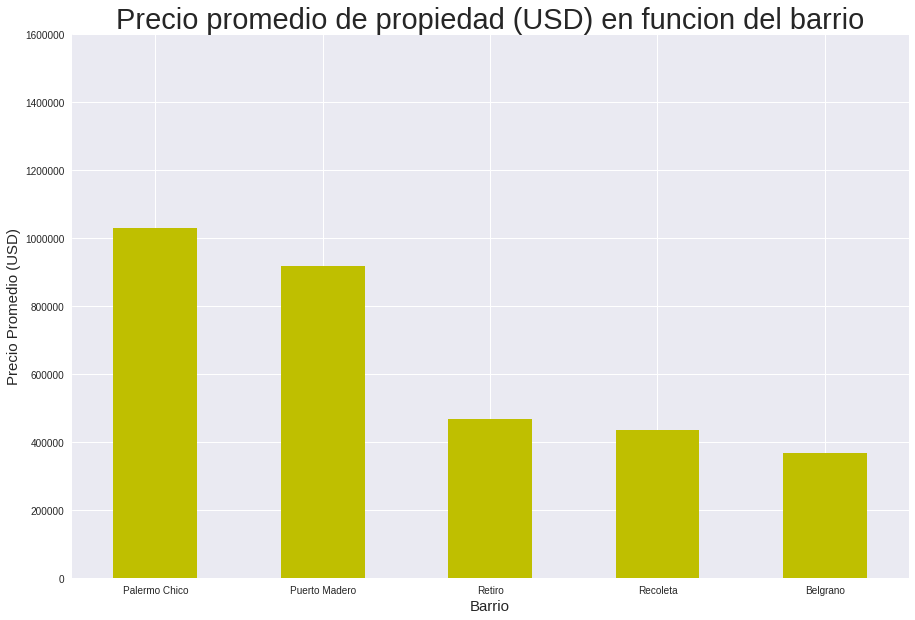

In [119]:
_2017_pr = data_2017.loc[(data_2017.place_name.str.contains('Palermo Chico') | \
                             data_2017.place_name.str.contains('Puerto Madero') | \
                             data_2017.place_name.str.contains('Retiro') | \
                             data_2017.place_name.str.contains('Recoleta') | \
                             data_2017.place_name.str.contains('Belgrano') ) \
                             & (data_2017.price_aprox_usd > 0) & data_2017.state_name.str.contains(\
                            'Capital Federal'), ['place_name', 'price_aprox_usd']]
_2017_pr.dropna(inplace=True)
_2017_pr = _2017_pr.groupby('place_name').agg([np.mean])
_2017_pr = _2017_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = _2017_pr.plot(kind='bar', figsize =(15,10), color='y', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)
fig1.legend('')

En el 2017, hasta julio, es el mas cercano a nuestros tiempos y el que mas cerca de la realidad se encuentra. Se puede ver que Palermo Chico aumemto el precio promedio de sus propiedades, mientras que Puerto Madero, Retiro y Recoleta mantuvieron los suyos. Belgrano por su parte disminuyo.

Se puede ver entonces que todos los barrios aumentaron el precio promedio de sus propiedades, desde el 1er semestre del 2014 hasta julio del 2017, siendo el mas fluctuante Palermo Chico, quien vario mucho su precio en los primeros analisis, pero que finalemente su valor se modificaba entre un rango de valores altos de precios. Le sigue Puerto Madero, que aunque siempre se mostro como uno de los barrios mas caros, su precio variaba en un rango de 450000 dolares aproximadamente a lo largo de los analisis. Retiro, Recoleta y Belgrano mantuvieron sus precios promedio en un rango de no mas de 250000 dolares, flueron los que menos modificaciones en el precio sufrieron.

# Precio en funcion del tipo de propiedad en venta

In [120]:
tipo_prop = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.\
                contains('Capital Federal') == False)& (dataset.price_aprox_usd > 0),['property_type',\
                'price_aprox_usd']]
tipo_prop.dropna(inplace=True)
tipo_prop = tipo_prop.groupby('property_type').agg([np.mean]).sort_values(('price_aprox_usd', 'mean') \
                                                                          , ascending = False).head()
tipo_prop

,price_aprox_usd
,mean
property_type,
house,472794.134508
store,450339.057963
apartment,222938.312914
PH,175442.683105


# ¿En que barrio son mas caras las casas, desde el 2014 hasta julio del 2017?

In [121]:
casas_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.\
                contains('Capital Federal') == False)& (dataset.property_type.str.contains('house')) \
                & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
casas_pr.dropna(inplace=True)
casas_pr = casas_pr.groupby('place_name').agg([np.mean,np.size])
casas_pr = casas_pr.loc[casas_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'),\
                ascending = False).head(5)
casas_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
casas_pr

,price_aprox_usd
,mean
place_name,
Belgrano,1.088002e+06
Palermo,7.924864e+05
Villa Devoto,4.267653e+05
Caballito,4.135204e+05
Villa Urquiza,3.910817e+05


# ¿En que barrio son mas caros los departamentos, desde el 2014 hasta julio del 2017?

In [122]:
deptos_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.\
                contains('Capital Federal') == False) & (dataset.property_type.str.contains('apartment')) \
                & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
deptos_pr.dropna(inplace=True)
deptos_pr = deptos_pr.groupby('place_name').agg([np.mean,np.size])
deptos_pr = deptos_pr.loc[deptos_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'),\
                ascending = False).head(5)
deptos_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
deptos_pr

,price_aprox_usd
,mean
place_name,
Puerto Madero,878486.281202
Palermo Chico,788957.532966
Recoleta,399116.940509
Retiro,378782.596592
Belgrano,315365.003004


# ¿En que barrio son mas caros los PH, desde el 2014 hasta julio del 2017? 

In [123]:
ph_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains\
                ('Capital Federal') == False) & (dataset.property_type.str.contains('PH')) \
                & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
ph_pr.dropna(inplace=True)
ph_pr = ph_pr.groupby('place_name').agg([np.mean,np.size])
ph_pr = ph_pr.loc[ph_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'),\
                                                                        ascending = False).head(5)
ph_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
ph_pr

,price_aprox_usd
,mean
place_name,
Palermo,266492.629474
Belgrano,242242.342342
Caballito,202328.638498
Almagro,193667.525773
Villa Crespo,188174.795350


# ¿En que barrio son mas caros los negocios, desde el 2014 hasta julio del 2017?

In [124]:
negocios_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.\
                contains('Capital Federal') == False) & (dataset.property_type.str.contains('store')) \
                & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
negocios_pr.dropna(inplace=True)
negocios_pr = negocios_pr.groupby('place_name').agg([np.mean,np.size])
negocios_pr = negocios_pr.loc[negocios_pr[('price_aprox_usd', 'size')]>50,:].sort_values(('price_aprox_usd',\
                'mean'), ascending = False).head(5)
negocios_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
negocios_pr

,price_aprox_usd
,mean
place_name,
San Nicolás,621405.814568
San Telmo,568618.048642
Recoleta,563532.595000
Palermo,557311.293493
Balvanera,538694.138654


### Seguimos el análisis de los inmuebles de tipo negocio:
### Estudiaremos su cantidad y precio promedio en la región más 'céntrica' de la Argentina: la Capital Federal

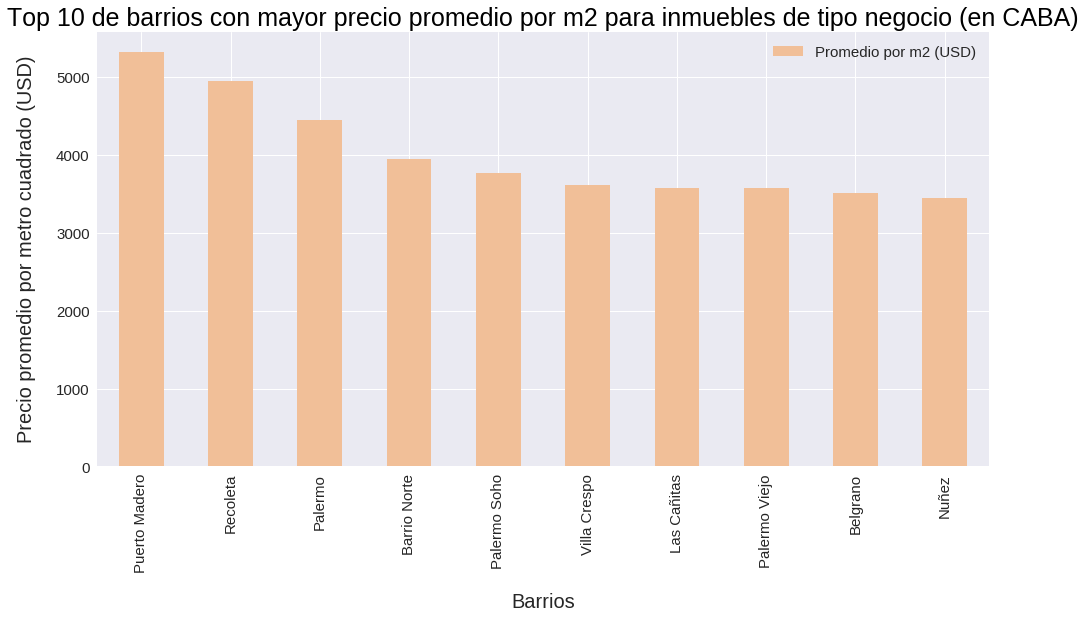

In [125]:
dataset_neg = dataset
dataset_neg.dropna(subset=['property_type', 'place_with_parent_names'], inplace=True)
dataset_neg_capital = dataset_neg.loc[(dataset_neg.place_with_parent_names.str.contains('Capital Federal') & \
                            (dataset_neg.property_type.str.contains('store'))), ['place_name', 'price_usd_per_m2']]
dataset_neg_capital.dropna(inplace = True)
dataset_neg_capital_por_barrio = dataset_neg_capital.groupby('place_name').agg([np.mean, np.size])
dataset_neg_capital_por_barrio.columns=['promedio', 'tamanio']
prom_neg_capital_por_barrio_ordenado \
    = dataset_neg_capital_por_barrio.loc[(dataset_neg_capital_por_barrio.tamanio > 4),:].sort_values('promedio',\
                        ascending=False)

f = plt.figure()
ax = prom_neg_capital_por_barrio_ordenado.head(10).plot(y='promedio', kind='bar', figsize=(16,8), \
                                                             color='#F1BF98', ax=f.gca())
ax.set_title('Top 10 de barrios con mayor precio promedio por m2 para inmuebles de tipo negocio (en CABA)',\
             color='black',size=25.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
ax.legend(["Promedio por m2 (USD)"], prop={'size': 15.0});
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

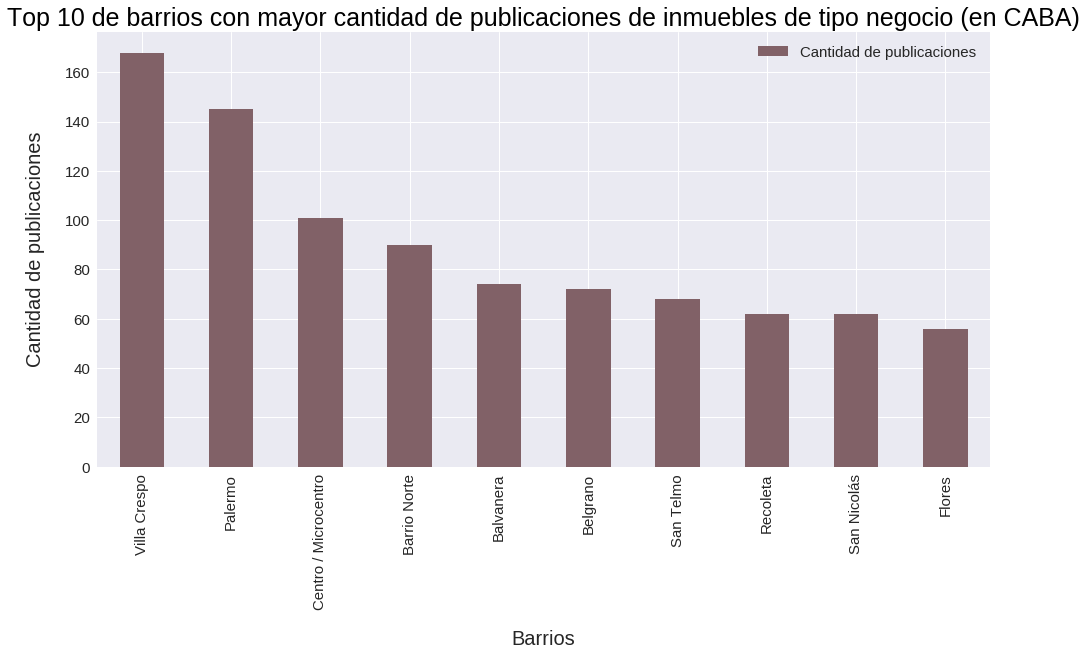

In [126]:
cant_negocios_capital_por_barrio_ordenado = dataset_neg_capital_por_barrio.loc[(dataset_neg_capital_por_barrio.\
                                tamanio > 4),:].sort_values('tamanio', ascending=False)
f = plt.figure()
ax = cant_negocios_capital_por_barrio_ordenado.head(10).plot(y='tamanio', kind='bar', figsize=(16,8),\
                                                     color='#816167', ax=f.gca())
ax.set_title('Top 10 de barrios con mayor cantidad de publicaciones de inmuebles de tipo negocio (en CABA)',\
             color='black',size=25.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
ax.legend(["Cantidad de publicaciones"], prop={'size': 15.0});
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()


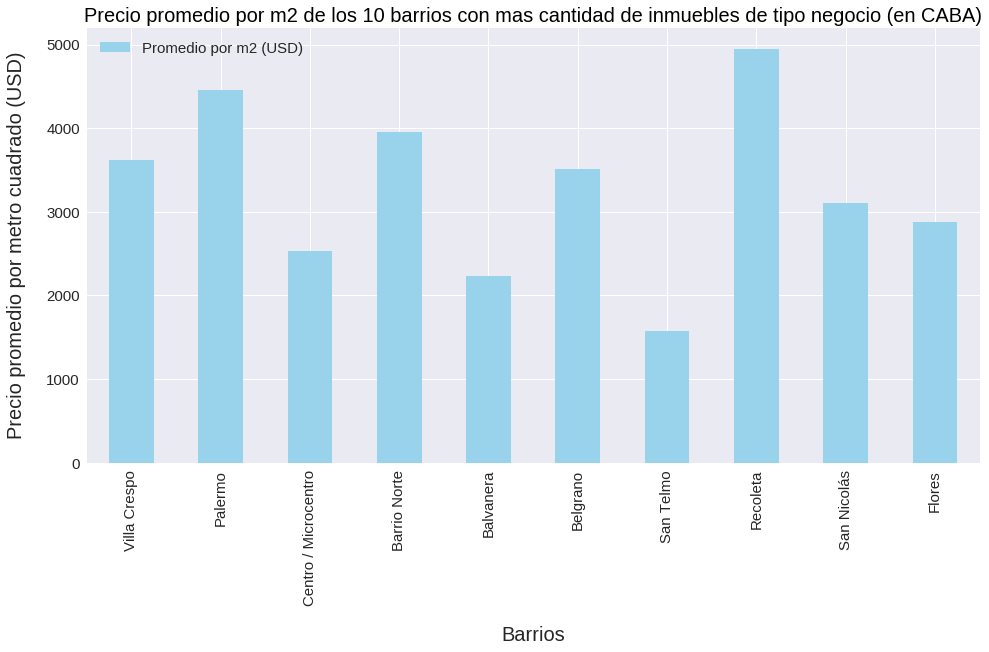

In [127]:
cant_y_promedio_negocios_capital_por_barrio = \
    dataset_neg_capital_por_barrio.loc[(dataset_neg_capital_por_barrio.tamanio > 4),:].sort_values('tamanio',\
                                ascending=False)['promedio']
    
f = plt.figure()
ax = cant_y_promedio_negocios_capital_por_barrio.head(10).plot(y='promedio', kind='bar', figsize=(16,8), \
                                                             color='#98D2EB', ax=f.gca())
ax.set_title('Precio promedio por m2 de los 10 barrios con mas cantidad de inmuebles de tipo negocio (en CABA)',\
             color='black',size=20.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por metro cuadrado (USD)',size=20.0,labelpad=20.0)
ax.legend(["Promedio por m2 (USD)"], prop={'size': 15.0});
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

Los barrios de Puerto Madero, Recoleta, Palermo y Barrio Norte son algunos de los más tradicionales de la Capital Federal y tiene sentido que en estos se encuentren los inmuebles de tipo negocio más caros (en promedio), no sólo por el valor del metro cuadrado en dicho barrio, sino también por el alto poder adquisitivo de la gente que los transita y ocupa: potenciales consumidores.

Con respecto al precio promedio de los barrios con mayor cantidad de inmuebles de tipo negocio sorprende que barrios como Flores o Villa Crespo tengan un mayor precio promedio que otros más céntricos y transitados como son Microcentro y San Telmo. Esto puede deberse a otros factores como por ejemplo la presencia de zonas estratégicas en dichos barrios, que acaparan la concentración de muchísimos negocios.

# ¿Hay alguna correlación entre la superficie por m2 y el precio por m2?
#### En principio creeríamos que no. El precio por m2 no dependería de la superficie del departamento, sino que son otros los factores que condicionan este promedio

In [128]:
dataset_sup = dataset
dataset_sup.dropna(subset=['surface_total_in_m2', 'price_usd_per_m2'], inplace=True)
dataset_sup = dataset_sup.loc[(dataset_sup.price_usd_per_m2 < 10000) & (dataset_sup.surface_total_in_m2 < 1000),\
                              ['surface_total_in_m2', 'price_usd_per_m2']]
dataset_sup['price_usd_per_m2'] = dataset_sup['price_usd_per_m2'].apply(lambda x: round(x, 2))
dataset_sup['surface_total_in_m2'] = dataset_sup['surface_total_in_m2'].apply(lambda x: int(x))
dataset_sup.head(10)

,surface_total_in_m2,price_usd_per_m2
12,38,2368.42
13,63,1301.59
15,220,659.09
16,59,1576.27
17,59,1576.27
18,59,1576.27
19,59,1576.27
20,55,1690.91
21,55,1690.91
22,55,1690.91


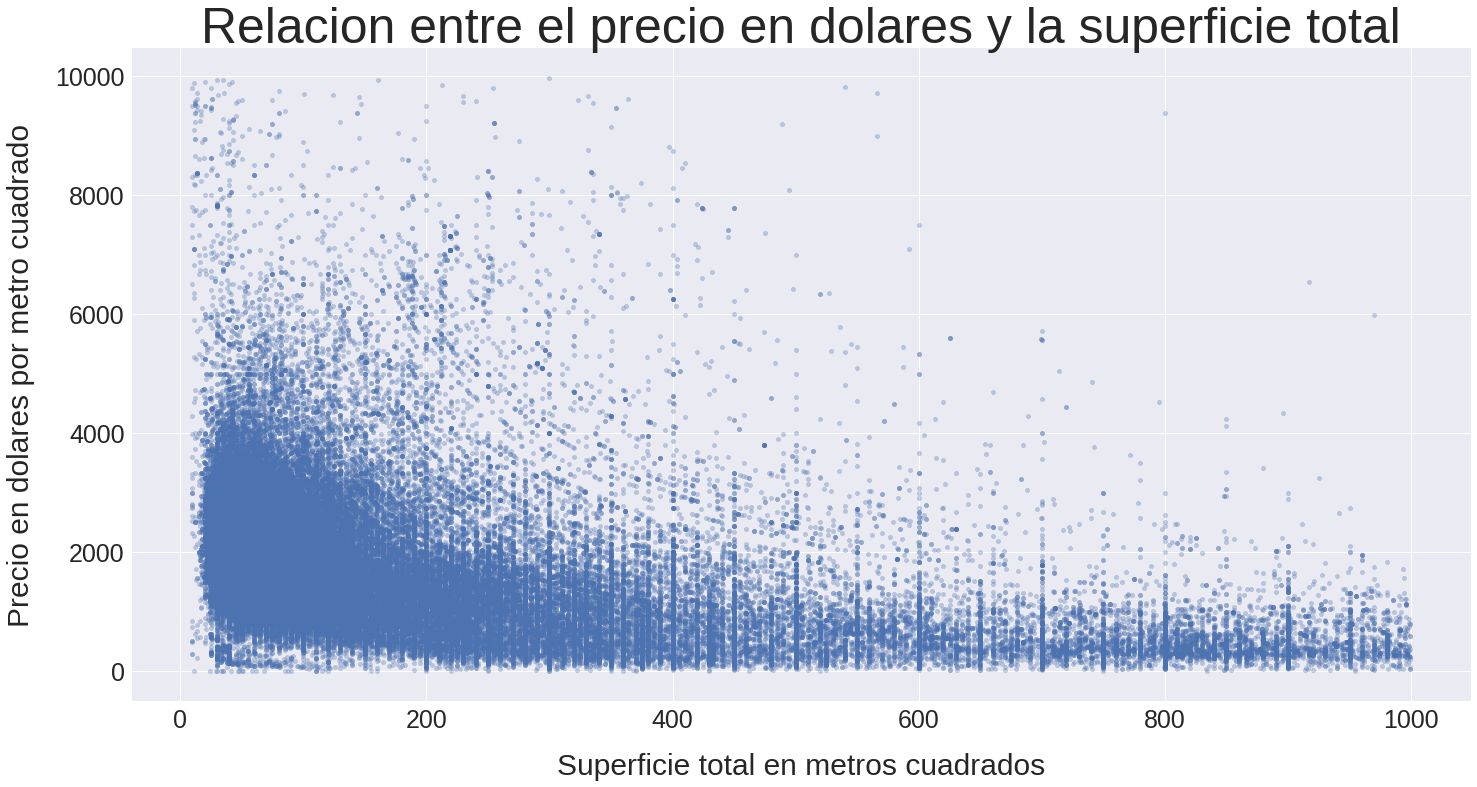

In [129]:
#Para evitar que el gráfico se extienda demasiado y pierda claridad, tomamos aquellos inmuebles con un valor de
#superficie total en metros cuadrados menor a mil metros

f = plt.figure()
ax = dataset_sup.plot.scatter('surface_total_in_m2','price_usd_per_m2',alpha=0.32,figsize=(24,12),ax=f.gca());
ax.set_ylabel('Precio en dolares por metro cuadrado',size=30.0,labelpad=20.0)
ax.set_xlabel('Superficie total en metros cuadrados', size=30.0,labelpad=20.0)
ax.set_title('Relacion entre el precio en dolares y la superficie total', size= 50.0)
plt.yticks(size = 25)
plt.xticks(size = 25)
#ax.legend(["Inmuebles filtrados por precio en USD y superficie en m2"], prop={'size': 20.0})
plt.show()


Como podemos ver en este scatter plot, no se da una relación entre el precio por metro cuadrado (en dólares) y la superficie total. Esto tiene sentido, ya que el precio por metro cuadrado es el cociente entre el precio aproximado en dólares y la superficie total. A mayor o menor superficie, el precio por metro cuadrado no tiene por qué ser menor o mayor, ya que depende a su vez del precio aproximado en dólares. Vemos también, que la gran mayoría de ocurrencias se dan en el siguiente caso: precio por metro cuadrado menor o igual a cuatro mil dólares y superficie total menor o igual a 200 metros cuadrados.

## ¿Las viviendas que cuentan con cochera son más caras, en promedio, que aquellas que no?
#### Analizamos en Capital Federal

In [130]:
dataset_viviendas = dataset
dataset_viviendas.dropna(subset=['created_on'], inplace=True)
dataset_viviendas['fecha'] = pd.to_datetime(dataset_viviendas['created_on'])
dataset_viviendas['anio'] = dataset_viviendas['fecha'].map(lambda x:x.year)
dataset_viviendas['mes'] = dataset_viviendas['fecha'].map(lambda x:x.month)
dataset_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153696 entries, 12 to 340842
Data columns (total 33 columns):
country_name                  153696 non-null object
created_on                    153696 non-null object
currency                      153671 non-null object
description                   153692 non-null object
expenses                      20034 non-null float64
floor                         19935 non-null float64
geonames_id                   127861 non-null float64
id                            153696 non-null object
image_thumbnail               152322 non-null object
lat                           120128 non-null float64
lat-lon                       120128 non-null object
lon                           120128 non-null float64
operation                     153696 non-null object
place_name                    153675 non-null object
place_with_parent_names       153696 non-null object
price                         153696 non-null float64
price_aprox_local_currency    153696

In [131]:
dataset_viviendas = dataset
dataset_viviendas.dropna(subset=['property_type','price_usd_per_m2', 'place_name'], inplace=True)
dataset_viviendas = dataset_viviendas.loc[(~dataset_viviendas.property_type.str.contains('store')),\
                    ['description','property_type', 'price_usd_per_m2', 'state_name', 'place_name']]
dataset_viviendas.dropna(subset=['description', 'price_usd_per_m2', 'state_name'])

dataset_viviendas_cochera = dataset_viviendas.loc[dataset_viviendas.description.str.contains(\
            'garaje|garage|garagge|cochera|estacionamiento', case=False) & (dataset_viviendas.state_name.str.\
            contains('Capital Federal')),['price_usd_per_m2', 'place_name']].drop_duplicates().reset_index\
            (drop=True)

dataset_viviendas_sin_cochera = dataset_viviendas.loc[(dataset_viviendas.description.str.contains(\
            'garaje|cochera|garage|garagge|estacionamiento')==False) & (dataset_viviendas.state_name.str.\
            contains('Capital Federal')),['description', 'price_usd_per_m2', 'place_name']].drop_duplicates()\
            .reset_index(drop=True)

dataset_viviendas_cochera_promedio_por_barrio = dataset_viviendas_cochera.loc[:,['price_usd_per_m2', \
            'place_name']].groupby('place_name').agg([np.mean,np.size])
dataset_viviendas_cochera_promedio_por_barrio.columns=['promedio_con', 'tamanio_con']
dataset_viviendas_cochera_promedio_por_barrio = dataset_viviendas_cochera_promedio_por_barrio\
    .loc[dataset_viviendas_cochera_promedio_por_barrio.tamanio_con >5 ,:]

dataset_viviendas_sin_cochera_promedio_por_barrio = dataset_viviendas_sin_cochera.loc[:,['price_usd_per_m2',\
            'place_name']].groupby('place_name').agg([np.mean,np.size])
dataset_viviendas_sin_cochera_promedio_por_barrio.columns=['promedio_sin', 'tamanio_sin']
dataset_viviendas_sin_cochera_promedio_por_barrio = dataset_viviendas_sin_cochera_promedio_por_barrio\
    .loc[dataset_viviendas_sin_cochera_promedio_por_barrio.tamanio_sin >5 ,:]

dataset_join = dataset_viviendas_cochera_promedio_por_barrio.join(dataset_viviendas_sin_cochera_promedio_por_barrio,\
            on=None, how='inner')
dataset_join = dataset_join.drop(['Capital Federal'])
dataset_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Abasto to Villa del Parque
Data columns (total 4 columns):
promedio_con    57 non-null float64
tamanio_con     57 non-null float64
promedio_sin    57 non-null float64
tamanio_sin     57 non-null float64
dtypes: float64(4)
memory usage: 2.2+ KB


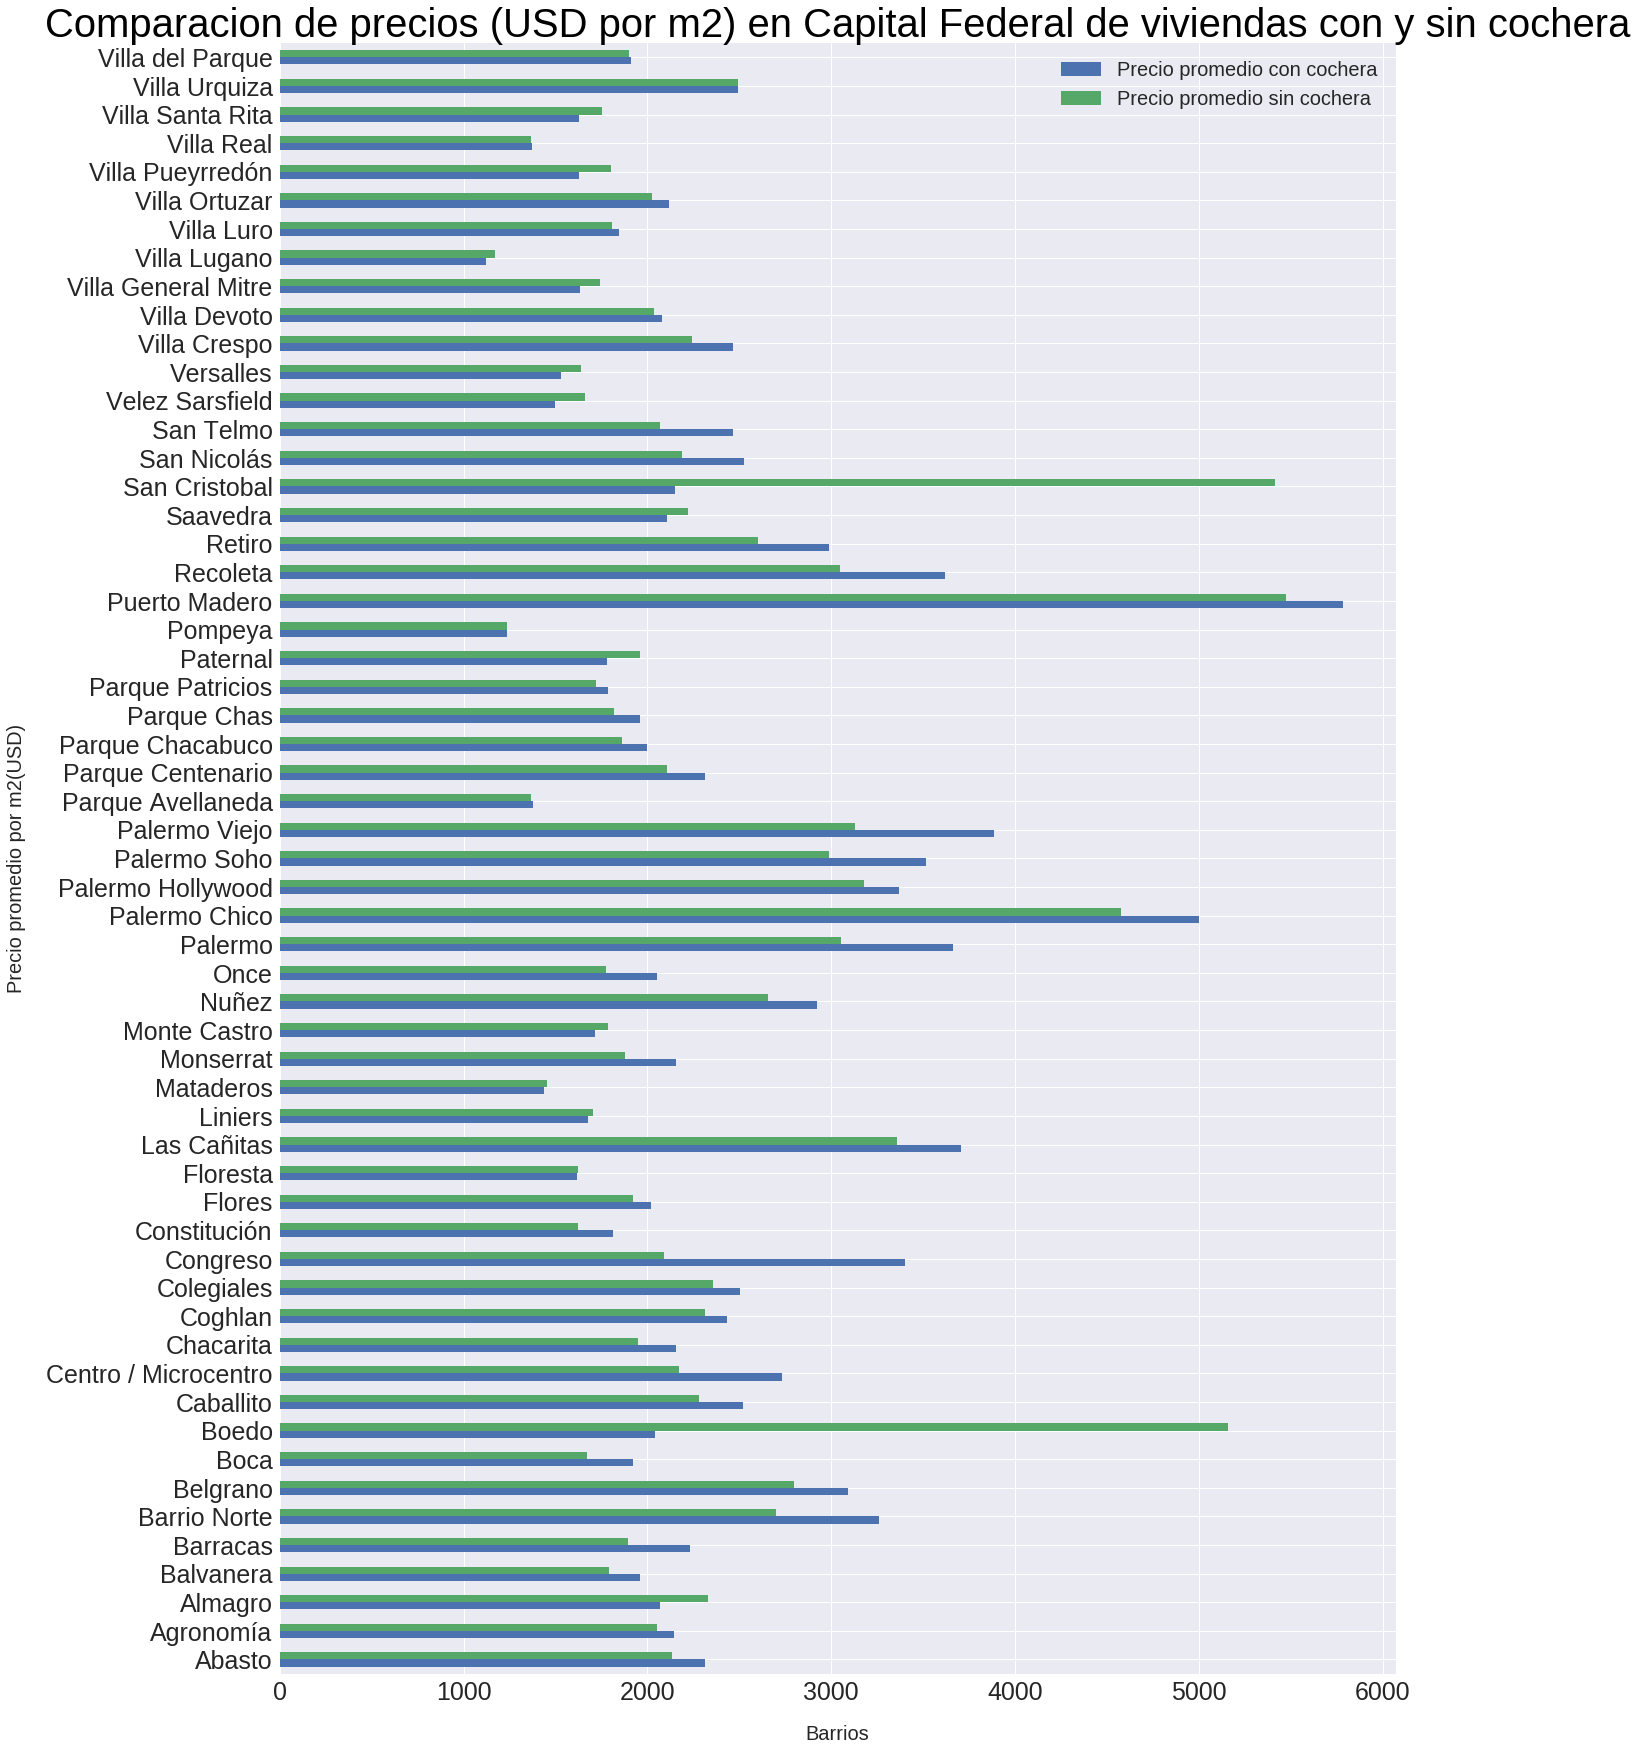

In [132]:
f = plt.figure()
ax = dataset_join.loc[:,['promedio_con', 'promedio_sin']].plot(kind='barh',figsize=(20,30), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en Capital Federal de viviendas con y sin cochera',\
             color='black',size=40.0)
ax.set_xlabel('Barrios',size=20.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=20.0,labelpad=20.0)
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.legend(["Precio promedio con cochera", "Precio promedio sin cochera"], prop={'size': 20.0})
plt.show()

En Capital Federal el precio promedio con y sin cochera es muy dispar. Por ejemplo, en barrios como Palermo Chico, Barrio Norte, Las Cañitas o San Telmo, el precio promedio con cochera supera (ampliamente) al precio promedio sin cochera. Por otro lado, en barrios como Boedo, San Cristóbal, Villa Urquiza, Villa Ortúzar, Almagro, el precio promedio sin cochera supera al de las propiedades con estacionamiento.

Esto puede deberse a que los primeros son barrios mucho más céntricos y transitados (con mucho más tránsito de vehículos) y por ello la cochera resulta ser un factor clave a la hora de buscar un inmueble. Con respecto a los segundos, se tratan de barrios más residenciales y con menos caudal de transporte. Es por esto que los inmuebles más caros, en promedio, no son aquellos que poseen estacionamiento, sino que el factor puede pasar por otro lado: cercanía a las estaciones de subte o de tren, cercanía a hospitales o comisarías, etc.

## ¿Las viviendas que cuentan con pileta son más caras, en promedio, que aquellas que no?
#### Analizamos en Capital Federal

In [133]:
data_viviendas = dataset
data_viviendas.dropna(subset=['property_type','price_usd_per_m2', 'place_name'], inplace=True)
data_viviendas = data_viviendas.loc[(~data_viviendas.property_type.str.contains('store')),['description',\
            'property_type','price_usd_per_m2', 'state_name', 'place_name']]
data_viviendas.dropna(subset=['description', 'price_usd_per_m2', 'state_name'])

data_viviendas_pileta = data_viviendas.loc[data_viviendas.description.str.contains('pileta|piscina', case=False) \
                        & (data_viviendas.state_name.str.contains('Capital Federal')), ['price_usd_per_m2',\
                        'place_name']].drop_duplicates().reset_index(drop=True)

data_viviendas_sin_pileta = data_viviendas.loc[(data_viviendas.description.str.contains('pileta|piscina')==False)\
                        & (data_viviendas.state_name.str.contains('Capital Federal')), ['description', \
                        'price_usd_per_m2', 'place_name']].drop_duplicates().reset_index(drop=True)

data_viviendas_pileta_promedio_por_barrio = data_viviendas_pileta.loc[:,['price_usd_per_m2', 'place_name']].\
            groupby('place_name').agg([np.mean,np.size])
data_viviendas_pileta_promedio_por_barrio.columns=['promedio_con', 'tamanio_con']
data_viviendas_pileta_promedio_por_barrio = data_viviendas_pileta_promedio_por_barrio\
    .loc[data_viviendas_pileta_promedio_por_barrio.tamanio_con >5 ,:]

data_viviendas_sin_pileta_promedio_por_barrio = data_viviendas_sin_pileta.loc[:,['price_usd_per_m2',\
        'place_name']].groupby('place_name').agg([np.mean,np.size])
data_viviendas_sin_pileta_promedio_por_barrio.columns=['promedio_sin', 'tamanio_sin']
data_viviendas_sin_pileta_promedio_por_barrio = data_viviendas_sin_pileta_promedio_por_barrio\
    .loc[data_viviendas_sin_pileta_promedio_por_barrio.tamanio_sin >5 ,:]

data_join = data_viviendas_pileta_promedio_por_barrio.join(data_viviendas_sin_pileta_promedio_por_barrio,\
            on=None, how='inner')
data_join = data_join.drop(['Capital Federal'])
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, Abasto to Villa del Parque
Data columns (total 4 columns):
promedio_con    54 non-null float64
tamanio_con     54 non-null float64
promedio_sin    54 non-null float64
tamanio_sin     54 non-null float64
dtypes: float64(4)
memory usage: 2.1+ KB


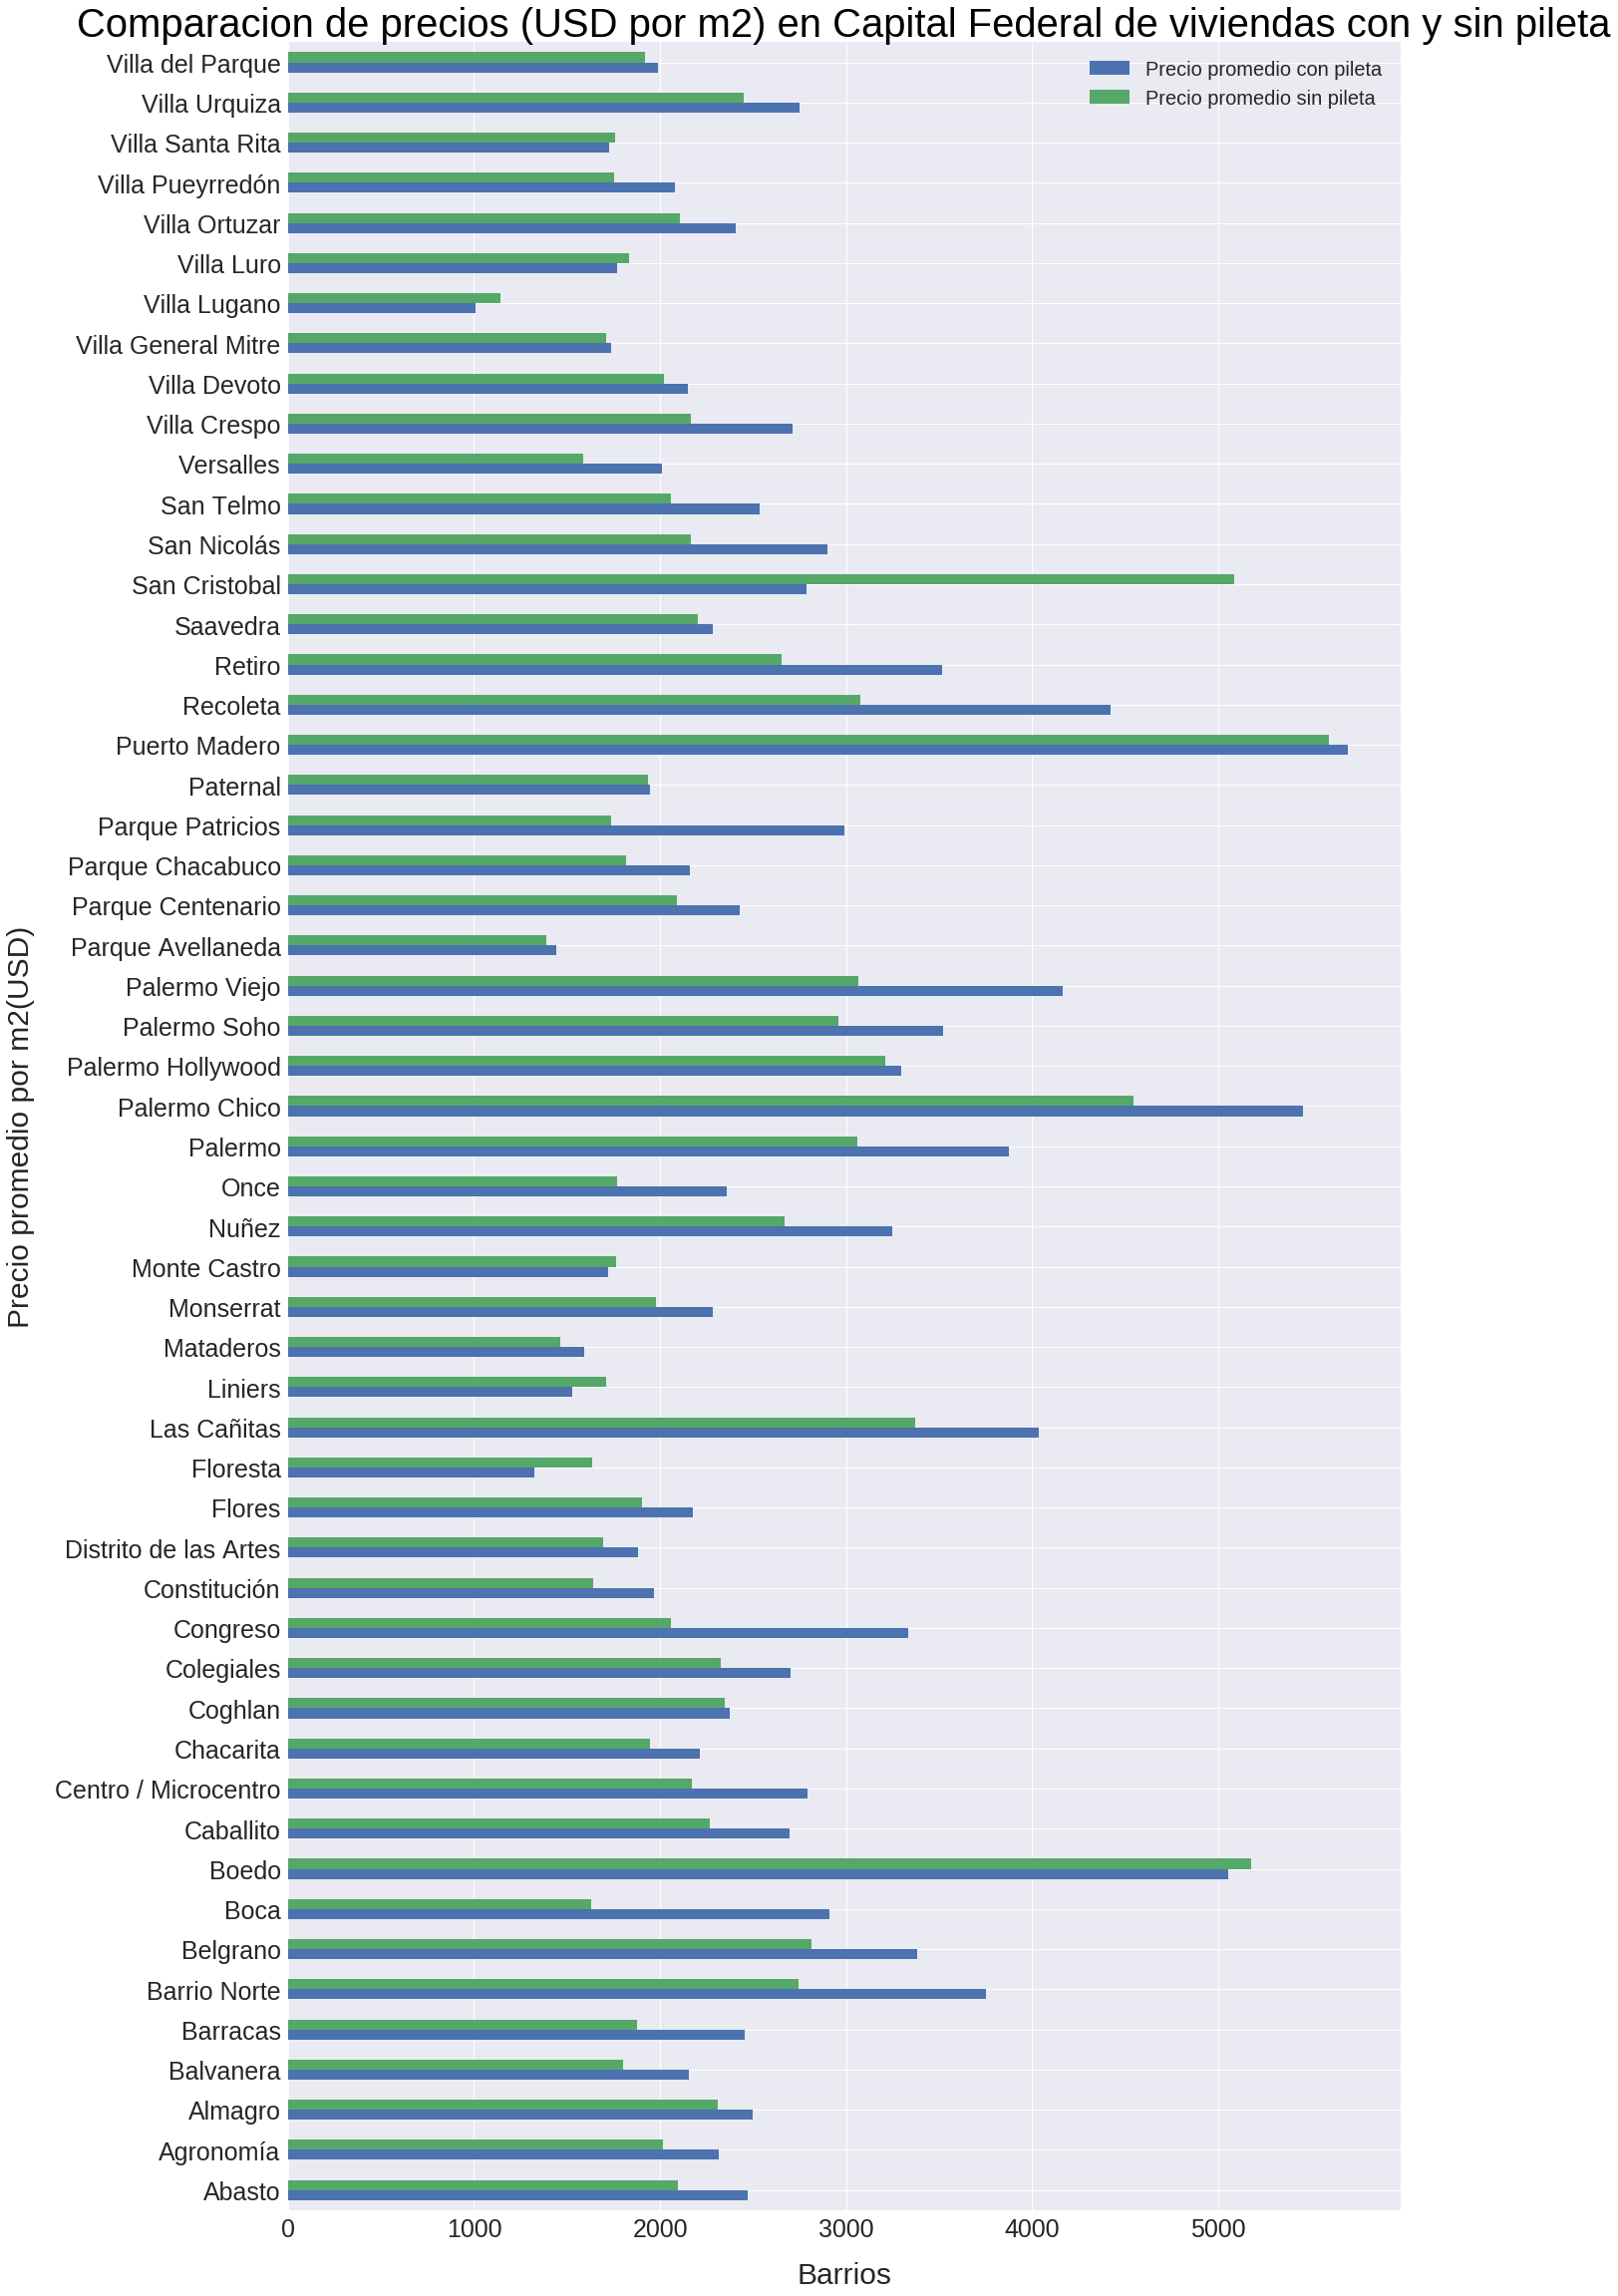

In [134]:
f = plt.figure()
ax = data_join.loc[:,['promedio_con', 'promedio_sin']].plot(kind='barh',figsize=(20,40), ax=f.gca())
ax.set_title('Comparacion de precios (USD por m2) en Capital Federal de viviendas con y sin pileta',\
             color='black',size=40.0)
ax.set_xlabel('Barrios',size=30.0,labelpad=20.0);
ax.set_ylabel('Precio promedio por m2(USD)', size=30.0,labelpad=20.0)
plt.legend(["Precio promedio con pileta", "Precio promedio sin pileta"], prop={'size': 20.0})
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.show()

En general, en este caso, las viviendas que tienen pileta suelen tener, en promedio, un mayor precio por metro cuadrado que aquellas que no. Son sólo unos pocos los contraejemplos: Boedo, Villa Luro, Villa Lugano, Villa Santa Rita todos ellos con una leve diferencia y la gran inconsistencia la presenta el barrio de San Cristóbal, para el cual podemos pensar que hay una anomalía en el dataset, o bien que ésta inconsistencia se debe a factores que no estamos analizando. De cualquier forma, hay que tener en cuenta que para el análisis anterior este último barrio también estaba entre los que presentaba una mayor diferencia de promedios, por lo que podemos sospechar que el dataset podría presentar una serie de datos anómalos en torno a este barrio.

## Estudio de un caso: "Vivir en 30 metros cuadrados, una tendencia que crece entre los porteños"

Noticia:
https://www.clarin.com/ciudades/departamentos-chicos_0_rkflu6AuPme.html

Si bien nuestro dataset es acotado, y todas las conclusiones que podamos abordar a partir del estudio del mismo parten de una muestra reducida, podremos aunque sea verificar si ésta tendencia se ve reflejada en el listado de publicaciones de properati o no (y en qué medida) para el último semestre de 2016 y el primero de 2017.

## ¿La cantidad de publicaciones de casas de 30 metros cuadrados o menos va en alza?
## ¿Cuál es el porcentaje de publicaciones de casas por ambientes?

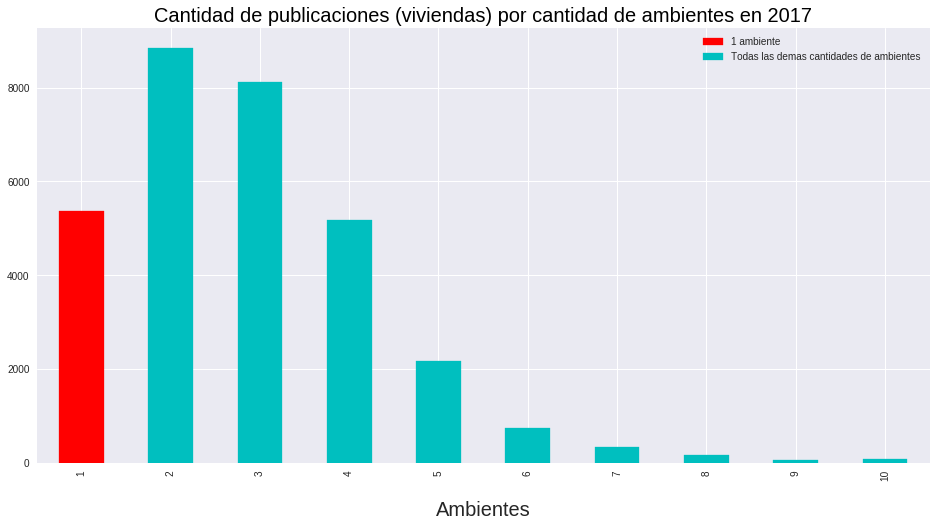

In [135]:
dataset_capital = dataset
dataset_capital.dropna(subset=['property_type', 'rooms'], inplace=True)
dataset_amb = dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & \
            (dataset_capital.rooms<11) & (dataset_capital.rooms > 0) & (dataset_capital.anio==2017),['rooms',\
            'state_name']].groupby('rooms').agg([np.size])

dataset_amb = pd.DataFrame(dataset_amb.to_records())
dataset_amb.columns=['rooms','size']
dataset_amb

dataset_amb = pd.pivot_table(dataset_amb, values='size', index='rooms')

f = plt.figure()
ax = dataset_amb.plot(kind='bar', figsize=(16,8), ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
ax.set_title('Cantidad de publicaciones (viviendas) por cantidad de ambientes en 2017', color='black',size=20.0)
ax.set_xticklabels(['1','2','3','4','5','6','7', '8', '9', '10'])
ax.set_xlabel('Ambientes',size=20.0,labelpad=20.0);
cyan_patch = mpatches.Patch(color='c', label='Todas las demas cantidades de ambientes')
red_patch = mpatches.Patch(color='r', label='1 ambiente')

ax.get_children()[0].set_color('r');ax.get_children()[1].set_color('c');ax.get_children()[2].set_color('c');
ax.get_children()[3].set_color('c');ax.get_children()[4].set_color('c');ax.get_children()[5].set_color('c');
ax.get_children()[6].set_color('c');ax.get_children()[7].set_color('c');ax.get_children()[8].set_color('c');
ax.get_children()[9].set_color('c');
plt.legend(handles=[red_patch,cyan_patch])
plt.show()



In [136]:
dataset_capital.dropna(subset=['created_on'], inplace=True)

import calendar
dataset_capital['fecha'] = pd.to_datetime(dataset_capital['created_on'])
dataset_capital['anio'] = dataset_capital['fecha'].map(lambda x:x.year)
dataset_capital['mes'] = dataset_capital['fecha'].map(lambda x:x.month)

### Evolución histórica de la cantidad de viviendas de un ambiente en los años 2016 y 2017

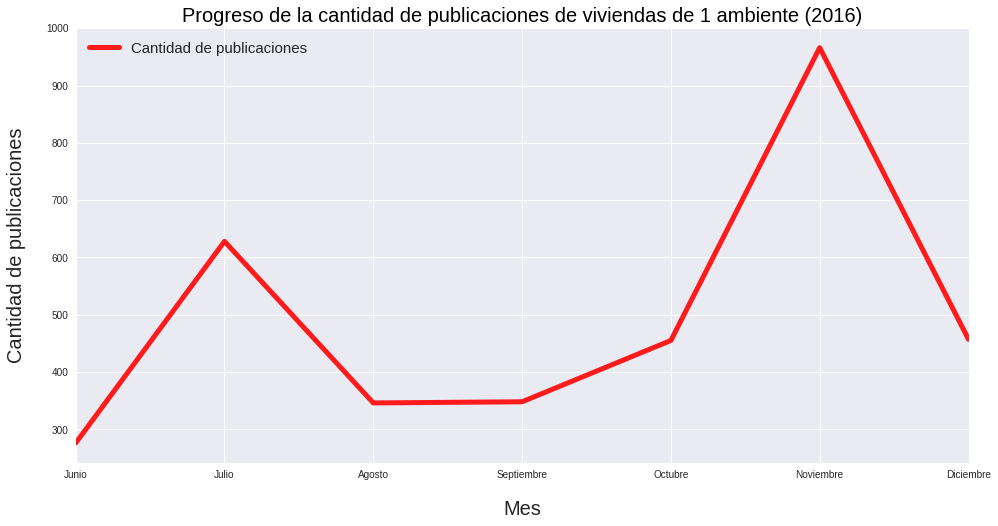

In [137]:
pev_1amb_2016 = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.rooms==1) & (dataset_capital.anio == 2016) & (dataset_capital.mes > 05), \
            ['mes', 'state_name']].groupby('mes').agg([np.size])
pev_1amb_2016 = pd.DataFrame(pev_1amb_2016.to_records())
pev_1amb_2016.columns=['mes','size']

f=plt.figure()
ax=pev_1amb_2016.plot( y='size', figsize=(16,8), ax=f.gca(), linewidth=5.0, color='#FF1B1C')
ax.set_title('Progreso de la cantidad de publicaciones de viviendas de 1 ambiente (2016)',\
             color='black',size=20.0)
ax.set_xticklabels(['Junio','Julio', 'Agosto', 'Septiembre','Octubre', 'Noviembre', 'Diciembre'])
ax.set_xlabel('Mes',size=20.0,labelpad=20.0);
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
plt.legend(['Cantidad de publicaciones'], fontsize=15);
plt.show()


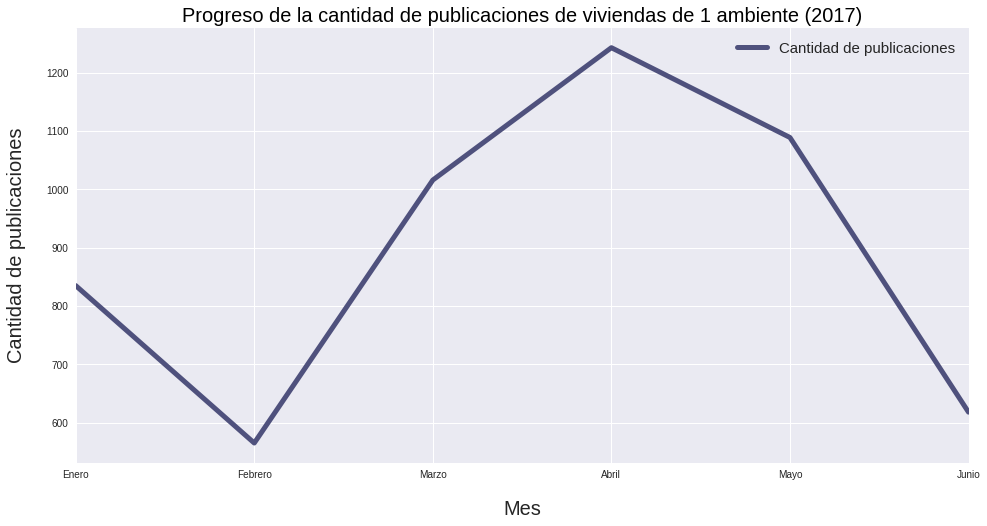

In [138]:
pev_1amb_2017 = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.rooms==1) \
            & (dataset_capital.anio == 2017),['mes', 'state_name']].groupby('mes').agg([np.size])
pev_1amb_2017 = pd.DataFrame(pev_1amb_2017.to_records())
pev_1amb_2017.columns=['mes','size']

f=plt.figure()
ax=pev_1amb_2017.plot( y='size', figsize=(16,8), ax=f.gca(), linewidth=5.0, color='#4F517D')
ax.set_title('Progreso de la cantidad de publicaciones de viviendas de 1 ambiente (2017)',\
             color='black',size=20.0)
ax.set_xticklabels(['Enero','Febrero', 'Marzo', 'Abril','Mayo', 'Junio'])
ax.set_xlabel('Mes',size=20.0,labelpad=20.0);
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
plt.legend(['Cantidad de publicaciones'], fontsize=15);
plt.show()


## Evaluemos la cantidad de publicaciones según superficie

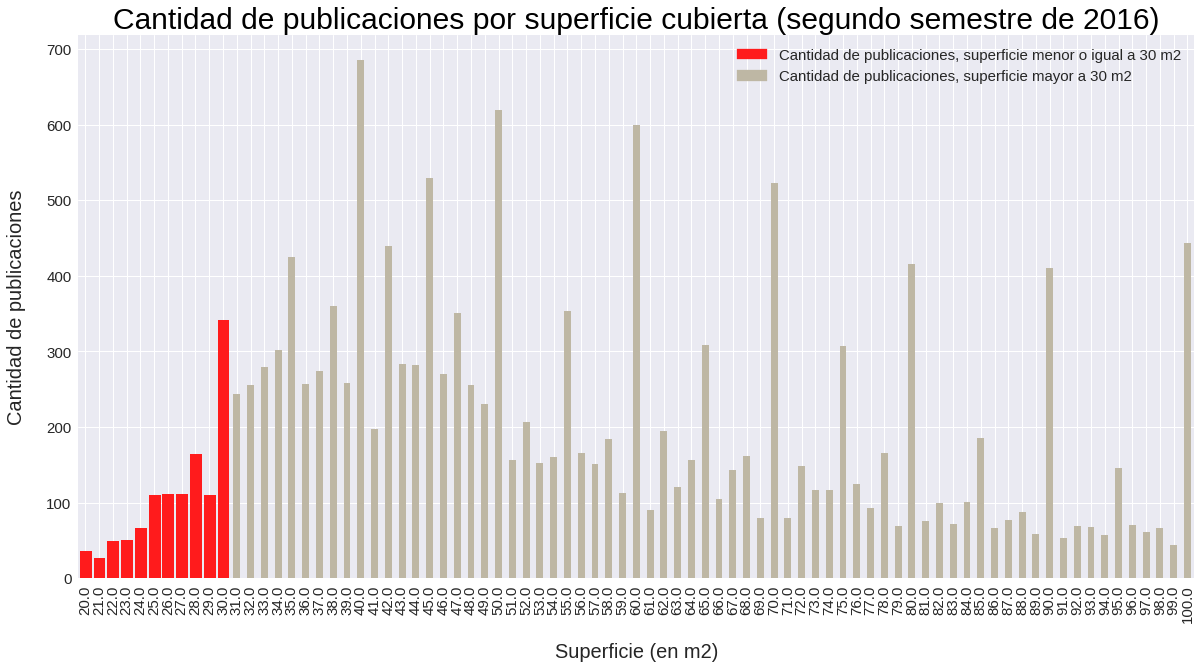

In [139]:
pev_sup_viviendas = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & (dataset_capital.mes > 5) &\
        (dataset_capital.surface_covered_in_m2 < 101.0) & (dataset_capital.surface_covered_in_m2 > 0) &\
        (dataset_capital.anio == 2016),['surface_covered_in_m2', 'place_name']].\
        groupby('surface_covered_in_m2').agg([np.size])
pev_sup_viviendas.columns=['size']
pev_sup_viviendas.dropna(inplace=True)

pev_sup_plot = pev_sup_viviendas.loc[ pev_sup_viviendas['size']>10 ,:]
f=plt.figure()
ax=pev_sup_plot.plot(kind='bar', figsize=(20,10), ax=f.gca(), linewidth=5.0, color='#BEB7A4')
ax.set_title('Cantidad de publicaciones por superficie cubierta (segundo semestre de 2016)',\
             color='black',size=30.0)
ax.set_xlabel('Superficie (en m2)',size=20.0,labelpad=20.0);
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
for i in range(11):
    ax.get_children()[i].set_color('#FF1B1C')

beige_patch = mpatches.Patch(color='#BEB7A4', label='Cantidad de publicaciones, superficie mayor a 30 m2')
red_patch = mpatches.Patch(color='#FF1B1C', label='Cantidad de publicaciones, superficie menor o igual a 30 m2')
plt.legend(handles=[red_patch,beige_patch], prop={'size': 15.0})
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

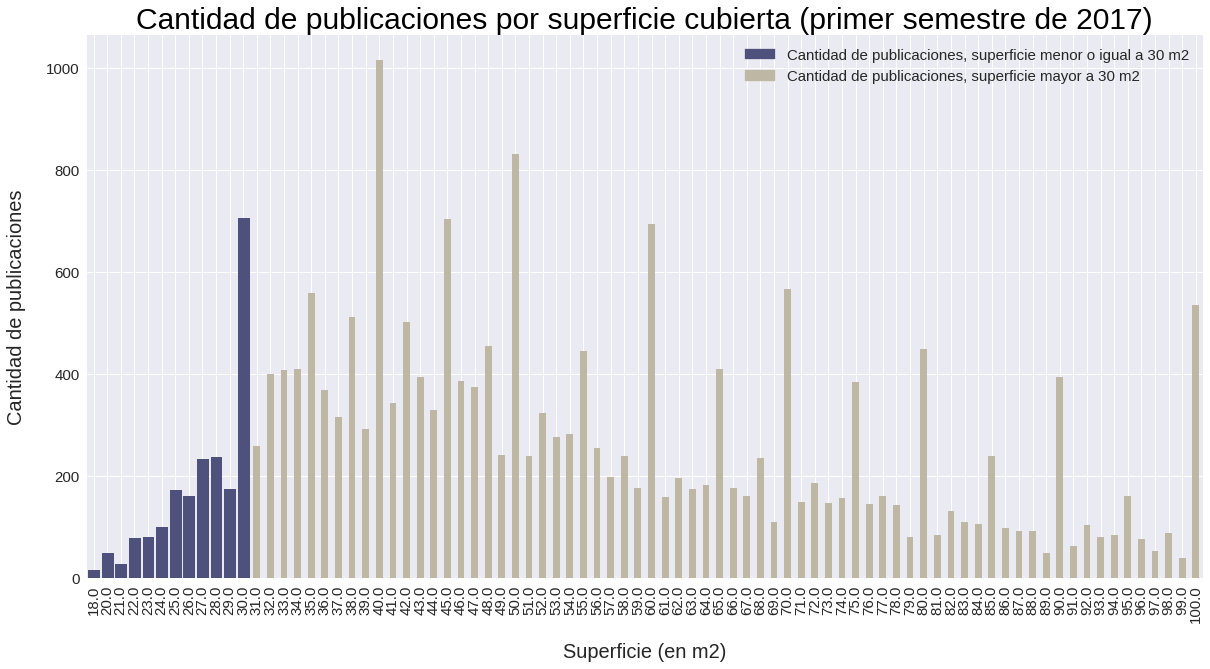

In [140]:
pev_sup_viviendas = \
    dataset_capital.loc[(~dataset_capital.property_type.str.contains('store')) & \
        (dataset_capital.surface_covered_in_m2 < 101.0) & (dataset_capital.surface_covered_in_m2 > 0) &\
        (dataset_capital.anio == 2017),['surface_covered_in_m2', 'place_name']].\
        groupby('surface_covered_in_m2').agg([np.size])
pev_sup_viviendas.columns=['size']
pev_sup_viviendas.dropna(inplace=True)

pev_sup_plot = pev_sup_viviendas.loc[ pev_sup_viviendas['size']>10 ,:]
f=plt.figure()
ax=pev_sup_plot.plot(kind='bar', figsize=(20,10), ax=f.gca(), linewidth=5.0, color='#BEB7A4')
ax.set_title('Cantidad de publicaciones por superficie cubierta (primer semestre de 2017)', \
             color='black',size=30)
ax.set_xlabel('Superficie (en m2)',size=20.0,labelpad=20.0)
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0)
for i in range(12):
    ax.get_children()[i].set_color('#4F517D')
    
beige_patch = mpatches.Patch(color='#BEB7A4', label='Cantidad de publicaciones, superficie mayor a 30 m2')
blue_patch = mpatches.Patch(color='#4F517D', label='Cantidad de publicaciones, superficie menor o igual a 30 m2')
plt.legend(handles=[blue_patch,beige_patch], prop={'size': 15.0})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Al estudiar la cantidad de publicaciones de tipo vivienda por cantidad de ambientes en lo que va del 2017 podemos ver que las publicaciones correspondientes a monoambientes son superadas únicamente por las publicaciones de viviendas de dos y tres ambientes.

Si evaluamos la evolución histórica entre el segundo semestre de 2016 y el primer semestre de 2017 podemos notar que para el año 2016 se presentaron dos picos: el primero de unos 600 inmuebles de un ambiente, y ya para Noviembre se registraron más de 900 monoambientes. En cuanto a 2017, en febrero se presenta un bajón importante en la cantidad de monoambientes publicados, pero ya para el mes de Abril la tendencia no solamente vuelve a crecer sino que alcanza un nuevo máximo local superando las 1200 publicaciones, para luego volver a caer.

Se puede ver una marcada actividad en el mercado de los monoambientes. No podemos inferir que ésta fluctuación se deba a la construcción de nuevas viviendas de un ambiente o a su venta, pero sí podemos asegurar que se trata de un mercado que está constantemente en movimiento.

Podemos ahondar aún más el análisis y si comparamos la cantidad de publicaciones por cada uno de estos semestres según la superficie cubierta, veremos que entre la segunda parte de 2016 y la primera de 2017 se dio un claro aumento total entre las publicaciones de 30 metros cuadrados o menos.

Con todo esto, podemos afirmar que la tendencia sigue vigente. Al menos según lo que podemos inferir por los inmuebles publicados en el dataset de properati, la cantidad de monoambientes y viviendas de 30 metros cuadrados o menos presentaron un aumento. ¿Tendencia o crisis habitacional?